# Intro

** **

# Table of Contents

<a class="anchor" id="top"></a>

** **

1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>
    
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)

   2.1 [Initial Exploration](#2.1-Initial-Exploration) <br>
    
   2.2 [Incoherencies](#2.2-Incoherencies) <br>
    
   2.3 [Initial Visualisations](#2.3-Initial-Visualisations) <br><br>
    
3. [Data Cleaning & Preprocessing](#3.-Data-Cleaning-&-Preprocessing)

   3.1 [Duplicates](#3.1-Duplicates) <br>
    
   3.2 [Feature Engineering](#3.2-Feature-Engineering) <br>
   
   &emsp; 3.2.1 [Data Type Conversions](#3.2.1-Data-Type-Conversions) <br>
    
   &emsp; 3.2.2 [Unique Feature-Pair Analysis](#3.2.2-Unique-Feature-Pair-Analysis) <br> 
    
   3.3 [Missing Values](#3.3-Missing-Values) <br>

   3.4 [Train-Test Split](#3.4-Train-Test-Split) <br>
    
   3.5 [Outliers](#3.5-Outliers) <br>

   3.6 [Visualisations](#3.6-Visualisations) <br><br>
    
4. [Feature Selection](#4.-Feature-Selection) <br><br>

5. [K-Fold](#5.-K-Fold)<br><br>
    
5. [Export](#5.-Export)


# 1. Importing Libraries & Data

<a href="#top">Top &#129033;</a>

In [1]:
import pandas as pd
import numpy as np


# profile report
from ydata_profiling import ProfileReport

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# external functions file
import functions as f

pd.set_option('display.max_columns', None)

/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('./project_data/train_data.csv', index_col = 'Claim Identifier')
df.head(3)

/var/folders/mm/fxsq_1490x9dd2w76tqvt3kr0000gn/T/ipykernel_14228/1192720404.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./project_data/train_data.csv', index_col = 'Claim Identifier')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0


In [3]:
test = pd.read_csv('./project_data/test_data.csv', index_col = 'Claim Identifier')
test.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,BRONX,N,NYC,NaN,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,QUEENS,N,NYC,NaN,F,NaN,45.0,RETAIL TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
6165907,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,1A. PRIVATE,WESTCHESTER,N,NYC,NaN,F,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0


# 2. Exploratory Data Analysis

<a href="#top">Top &#129033;</a>

## 2.1 Initial Exploration

In [4]:
# profile = ProfileReport(
#     df, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile

In [5]:
df.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0


In [7]:
df.shape

(593471, 32)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

**Correlation matrix**

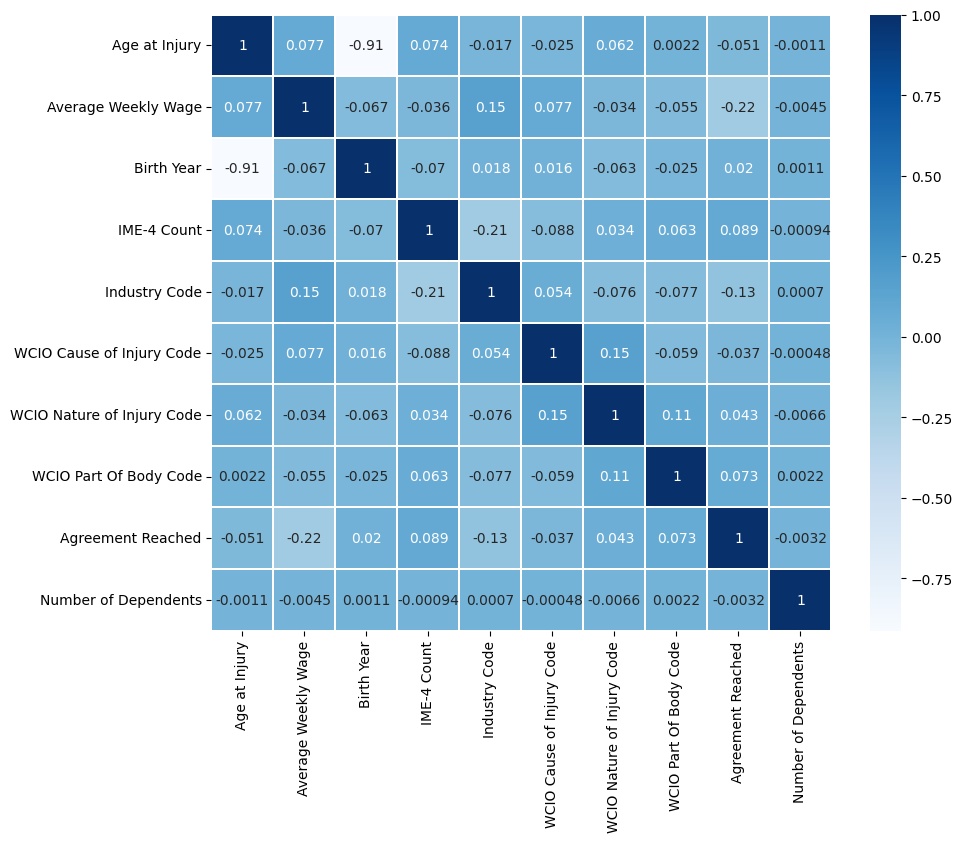

In [9]:
# drop column always missing
temp = df.drop('OIICS Nature of Injury Description', axis = 1)

# drop na
temp = temp.dropna()

# select numbers
corr_data = temp.select_dtypes(include=['number'])

correlation_matrix = corr_data.corr(method='spearman') # pearson by default

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.1)
plt.show()

**Unique Values**

In [10]:
for column in df.columns:
    
    if df[column].nunique() < 20:
        
        print(f"Unique values in '{column}': {df[column].unique()}")
        print(df[column].nunique(), '\n')

Unique values in 'Alternative Dispute Resolution': ['N' nan 'Y' 'U']
3 

Unique values in 'Attorney/Representative': ['N' 'Y' nan]
2 

Unique values in 'Carrier Type': ['1A. PRIVATE' nan '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC'
 'UNKNOWN' '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']
8 

Unique values in 'Claim Injury Type': ['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD']
8 

Unique values in 'COVID-19 Indicator': ['N' nan 'Y']
2 

Unique values in 'District Name': ['SYRACUSE' 'ROCHESTER' 'ALBANY' nan 'HAUPPAUGE' 'NYC' 'BUFFALO'
 'BINGHAMTON' 'STATEWIDE']
8 

Unique values in 'Gender': ['M' 'F' nan 'U' 'X']
4 

Unique values in 'Medical Fee Region': ['I' 'II' nan 'IV' 'UK' 'III']
5 

Unique values in 'OIICS Nature of Injury Description': [nan]
0 

Unique values in 'Agreement Reached': [ 0.  1. nan]
2 

Unique values in 'WCB Decision': ['

## 2.2 Incoherencies

<a href="#top">Top &#129033;</a>

**Age at Injury**

very high max values

In [11]:
df[df['Age at Injury'] > 100]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5415899,2020-01-24,102.0,N,2020-01-30,N,0.0,1917.0,2020-01-30,NaN,NORTH SYRACUSE CSD,3A. SELF PUBLIC,2. NON-COMP,ONONDAGA,N,SYRACUSE,NaN,F,NaN,61.0,EDUCATIONAL SERVICES,I,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",40.0,LACERATION,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,13031,0.0,Not Work Related,2.0
5424769,2018-08-26,117.0,N,2020-02-10,N,0.0,1901.0,2020-02-10,NaN,AMTRUST INS CO OF KANSAS INC,1A. PRIVATE,2. NON-COMP,KINGS,N,NYC,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),59.0,"ALL OTHER SPECIFIC INJURIES, NOC",65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,11218,0.0,Not Work Related,5.0
5432944,2020-02-17,113.0,N,2020-02-19,Y,692.0,1907.0,2020-02-19,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5. PPD SCH LOSS,NIAGARA,N,BUFFALO,NaN,F,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,I,NaN,60.0,"STRAIN OR INJURY BY, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",38.0,SHOULDER(S),NaN,0.0,Not Work Related,5.0
5453673,2020-03-05,104.0,N,2020-03-16,Y,0.0,1916.0,2020-03-16,NaN,ONEIDA COUNTY SELF INS PLAN,3A. SELF PUBLIC,2. NON-COMP,HERKIMER,N,SYRACUSE,NaN,M,NaN,92.0,PUBLIC ADMINISTRATION,II,NaN,56.0,LIFTING,10.0,CONTUSION,52.0,UPPER LEG,13502,0.0,Not Work Related,3.0
5459129,2018-03-22,117.0,N,2020-03-27,N,0.0,1901.0,2020-03-27,NaN,AMTRUST INS CO OF KANSAS INC,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,33.0,MANUFACTURING,IV,NaN,82.0,"ABSORPTION, INGESTION OR INHALATION, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,11703,0.0,Not Work Related,2.0
5546365,2016-11-01,115.0,N,2020-08-28,N,0.0,0.0,2020-08-28,NaN,WESCO INSURANCE CO,1A. PRIVATE,1. CANCELLED,ERIE,N,BUFFALO,2020-12-03,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,15.0,BROKEN GLASS,40.0,LACERATION,34.0,WRIST,14140,0.0,Not Work Related,5.0
5559268,2020-09-11,110.0,N,2020-09-15,N,0.0,1910.0,2020-09-15,NaN,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,2. NON-COMP,ORANGE,N,ALBANY,NaN,F,NaN,45.0,RETAIL TRADE,III,NaN,27.0,FROM LIQUID OR GREASE SPILLS,52.0,STRAIN OR TEAR,53.0,KNEE,10940,0.0,Not Work Related,1.0
5706270,2021-04-21,110.0,N,2021-04-23,N,0.0,1911.0,2021-04-23,NaN,WESCO INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,NaN,68.0,STATIONARY OBJECT,40.0,LACERATION,18.0,SOFT TISSUE,11946,0.0,Not Work Related,5.0
5804529,2021-07-02,101.0,N,2021-09-03,N,0.0,1920.0,2021-09-03,NaN,CAROLINA CASUALTY INS CO,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,35.0,HAND,11763,0.0,Not Work Related,0.0


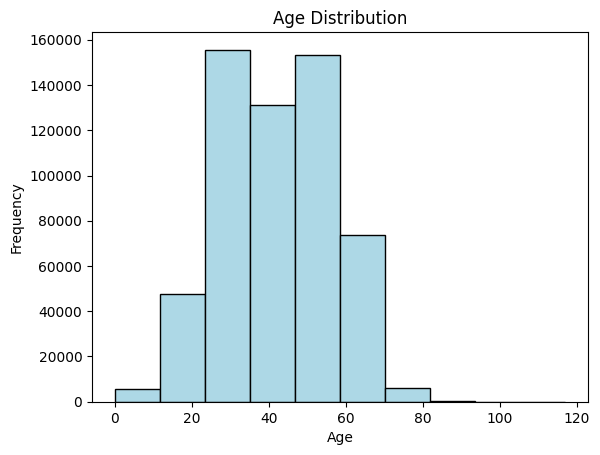

In [12]:
f.plot_histogram(df['Age at Injury'], 'Age', 'Frequency',
                'Age Distribution')

**Birth Year**

very Low values for Birth Year, but a LOT of rows with the same issue

In [13]:
df[df['Birth Year'] < 1800]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394187,2019-12-14,21.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,51.0,INFORMATION,UK,NaN,75.0,FALLING OR FLYING OBJECT,37.0,INFLAMMATION,53.0,KNEE,07649,0.0,Not Work Related,3.0
5394053,2019-12-18,53.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,TWIN CITY FIRE INS CO.,1A. PRIVATE,2. NON-COMP,WARREN,N,ALBANY,NaN,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,5.0,STEAM OR HOT FLUIDS,4.0,BURN,56.0,FOOT,12810,0.0,Not Work Related,4.0
5393827,2019-12-26,21.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,III,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",40.0,LACERATION,36.0,FINGER(S),11941,0.0,Not Work Related,3.0
5393885,2019-12-12,57.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,NATIONAL CASUALTY CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,NaN,32.0,ON ICE OR SNOW,28.0,FRACTURE,44.0,CHEST,13646,0.0,Not Work Related,2.0
5394008,2019-12-17,42.0,N,2020-01-01,N,0.0,0.0,2019-12-31,2020-04-16,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,51.0,INFORMATION,UK,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),NaN,0.0,Not Work Related,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164729,2022-11-30,44.0,N,2022-12-30,Y,0.0,0.0,2023-01-30,2022-12-27,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,BRONX,N,STATEWIDE,2023-05-19,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,-9.0,MULTIPLE,44405,0.0,Not Work Related,6.0
6165113,2022-12-26,22.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,51.0,INFORMATION,UK,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,53.0,KNEE,94603,0.0,Not Work Related,3.0
6165672,2022-12-28,31.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,UNKNOWN,N,NYC,NaN,M,NaN,42.0,WHOLESALE TRADE,UK,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,41.0,UPPER BACK AREA,05743,0.0,Not Work Related,1.0


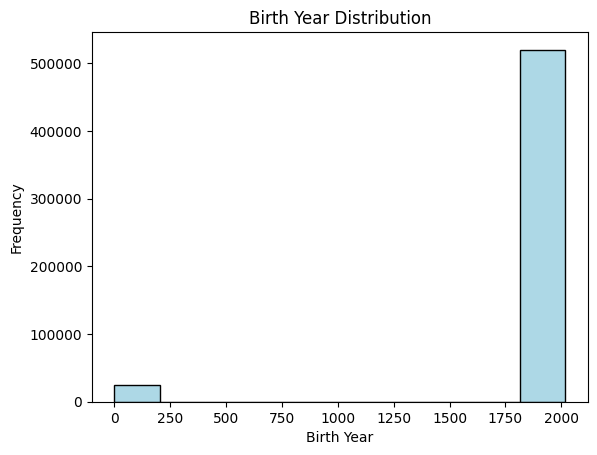

In [14]:
f.plot_histogram(df['Birth Year'], 'Birth Year', 'Frequency',
                'Birth Year Distribution')

**IME-4 Count**

Very High 

In [15]:
df[df['IME-4 Count'] > 30]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5395531,2019-12-26,51.0,N,2020-01-03,Y,1205.08,1968.0,2020-01-03,2020-01-17,A I U INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,QUEENS,N,NYC,2020-09-30,M,36.0,42.0,WHOLESALE TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,52.0,STRAIN OR TEAR,21.0,VERTEBRAE,11434,0.0,Not Work Related,4.0
5424849,2019-12-09,56.0,N,2020-02-11,Y,250.00,1963.0,2020-02-21,2020-01-30,NEW YORK BLACK CAR OPERATORS',4A. SELF PRIVATE,4. TEMPORARY,SUFFOLK,N,HAUPPAUGE,2020-08-20,M,32.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,49.0,SPRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11727,0.0,Not Work Related,1.0
5437678,2020-02-19,24.0,N,2020-02-25,Y,2525.55,1995.0,2020-02-25,2020-03-06,STARR INDEMNITY & LIABILITY,1A. PRIVATE,4. TEMPORARY,SUFFOLK,N,HAUPPAUGE,2020-04-29,M,39.0,23.0,CONSTRUCTION,IV,NaN,30.0,"SLIP, OR TRIP, DID NOT FALL",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,11793,0.0,Not Work Related,2.0
5447387,2020-02-29,53.0,N,2020-03-06,Y,1980.19,1966.0,2020-03-05,2020-05-07,VISITING NURSE SERVICE OF NY,4A. SELF PRIVATE,4. TEMPORARY,NEW YORK,N,NYC,2020-08-27,F,32.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,10025,0.0,Not Work Related,1.0
5448127,2020-02-19,67.0,N,2020-03-10,Y,250.00,1952.0,2020-03-17,2020-02-27,HEREFORD INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,QUEENS,N,NYC,2020-11-27,M,47.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,90.0,MULTIPLE PHYSICAL INJURIES ONLY,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,NaN,0.0,Not Work Related,4.0
5490306,2020-03-17,37.0,N,2020-06-01,Y,1502.14,1983.0,2020-06-12,2020-05-26,LIBERTY MUTUAL FIRE INS CO,1A. PRIVATE,4. TEMPORARY,NEW YORK,N,NYC,2021-02-23,M,48.0,33.0,MANUFACTURING,UK,NaN,29.0,ON SAME LEVEL,46.0,RUPTURE,38.0,SHOULDER(S),07105,0.0,Not Work Related,0.0
5491873,2020-06-01,46.0,N,2020-06-02,Y,851.41,1974.0,2020-06-02,2020-06-09,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,NEW YORK,N,NYC,2020-11-13,F,34.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,10039,0.0,Not Work Related,1.0
5525046,2020-07-13,42.0,N,2020-07-27,Y,1400.00,1977.0,2020-07-27,2020-10-20,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,NASSAU,N,NYC,2020-10-26,M,36.0,23.0,CONSTRUCTION,IV,NaN,81.0,"STRUCK OR INJURED, NOC",28.0,FRACTURE,55.0,ANKLE,11590,0.0,Not Work Related,1.0
5538883,2020-07-03,52.0,N,2020-08-18,Y,2672.78,NaN,2020-09-25,2020-08-12,STARR INDEMNITY & LIABILITY,1A. PRIVATE,6. PPD NSL,BRONX,N,NYC,2021-01-04,M,34.0,54.0,"PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES",IV,NaN,75.0,FALLING OR FLYING OBJECT,52.0,STRAIN OR TEAR,20.0,MULTIPLE NECK INJURY,10460,0.0,Not Work Related,3.0


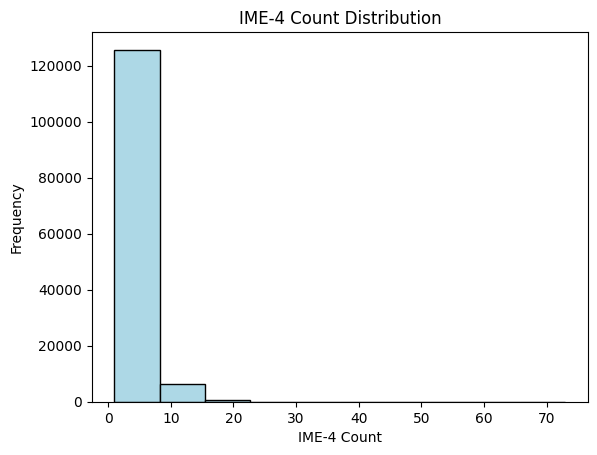

In [16]:
f.plot_histogram(df['IME-4 Count'], 'IME-4 Count', 'Frequency',
                'IME-4 Count Distribution')

**OIICS Nature of Injury Description**

always missing

In [17]:
print(f"Number of missing rows in variable OIICS Nature of Injury Description: {len(df[df['OIICS Nature of Injury Description'].isna()])}")
print(f"Number of Rows in the Dataset: {len(df)}")

Number of missing rows in variable OIICS Nature of Injury Description: 593471
Number of Rows in the Dataset: 593471


**Agreement Reached**

w/ a lot of zeros

In [18]:
df['Agreement Reached'].value_counts()

Agreement Reached
0.0    547239
1.0     26787
Name: count, dtype: int64

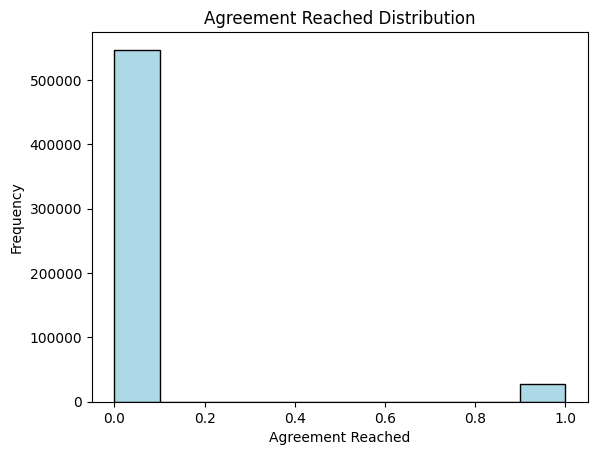

In [19]:
f.plot_histogram(df['Agreement Reached'], 'Agreement Reached', 'Frequency',
                'Agreement Reached Distribution')

**WCB Decision**

always the same

In [20]:
df['WCB Decision'].unique()

array(['Not Work Related', nan], dtype=object)

**Claim Injury Type**

imbalanced target 

In [21]:
df['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

**Incoherent Columns**

Some columns exist in train data but not on test

In [22]:
train_columns = set(df.columns)
test_columns = set(test.columns)

not_in_train = train_columns - test_columns
print(f'Columns in train but not in test: {not_in_train}')


Columns in train but not in test: {'Claim Injury Type', 'Agreement Reached', 'WCB Decision'}


## 2.3 Initial Visualisations

<a href="#top">Top &#129033;</a>

# 3. Data Cleaning & Preprocessing

<a href="#top">Top &#129033;</a>

## 3.1 Duplicates

<a href="#top">Top &#129033;</a>

In [23]:
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
363651794,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209507552,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970865999,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807753247,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395971406,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365870975,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df = df.drop_duplicates()

verify the success

In [25]:
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## 3.2 Feature Engineering

<a href="#top">Top &#129033;</a>

all transformations must be applied o X_test too

### 3.2.1 Data Type Conversions

even though this is usually feature engineering, it will be useful doing before treating missing values

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 575121 entries, 5393875 to 6165075
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574025 non-null  float64
 2   Alternative Dispute Resolution      574025 non-null  object 
 3   Assembly Date                       575121 non-null  object 
 4   Attorney/Representative             574025 non-null  object 
 5   Average Weekly Wage                 545374 non-null  float64
 6   Birth Year                          544947 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187244 non-null  object 
 9   Carrier Name                        574025 non-null  object 
 10  Carrier Type                        574025 non-null  object 
 11  Claim Injury Type       

In [27]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'], 
                                     errors='coerce')

df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], 
                                     errors='coerce')

df['C-2 Date'] = pd.to_datetime(df['C-2 Date'], 
                                errors='coerce')

df['C-3 Date'] = pd.to_datetime(df['C-3 Date'], 
                                errors='coerce')

df['First Hearing Date'] = pd.to_datetime(df['First Hearing Date'], 
                                          errors='coerce')

In [28]:
df.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0


**Accident Date**

transform into year (maybe month and day too)

In [29]:
df['Accident Year'] = df['Accident Date'].dt.year
df['Accident Month'] = df['Accident Date'].dt.month
df['Accident Day'] = df['Accident Date'].dt.day

**Alternative Dispute Resolution**

encode ['N' nan 'Y' 'U'] n -> 0, y -> 1, u -> 2

In [30]:
freq = df['Alternative Dispute Resolution'].value_counts()
freq

Alternative Dispute Resolution
N    571411
Y      2609
U         5
Name: count, dtype: int64

In [31]:
df['Alternative Dispute Resolution Enc'] = df['Alternative Dispute Resolution'].map(freq)

**Assembly Date**

transform into year (maybe month and day too)

In [32]:
df['Assembly Year'] = df['Assembly Date'].dt.year
df['Assembly Month'] = df['Assembly Date'].dt.month
df['Assembly Day'] = df['Assembly Date'].dt.day

**Attorney/Representative**

['N' 'Y' nan] encode 0/1

In [33]:
df['Attorney/Representative'].value_counts()

Attorney/Representative
N    392291
Y    181734
Name: count, dtype: int64

In [34]:
df['Attorney/Representative Bin'] = df['Attorney/Representative'].replace({'N': 0, 'Y': 1})

**C-2 Date**

transform into year (maybe month and day too)

In [35]:
df['C-2 Year'] = df['C-2 Date'].dt.year
df['C-2 Month'] = df['C-2 Date'].dt.month
df['C-2 Day'] = df['C-2 Date'].dt.day

**Carrier Name**

In [36]:
df['Carrier Name'].nunique()

2046

frequency encoder

In [37]:
freq = df['Carrier Name'].value_counts()

In [38]:
df['Carrier Name Enc'] = df['Carrier Name'].map(freq)

**Carrier Type**

encode (8 unique values)

In [39]:
freq = df['Carrier Type'].value_counts()
freq

Carrier Type
1A. PRIVATE                                    285367
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64

In [40]:
df['Carrier Type Enc'] = df['Carrier Type'].map(freq)

**County of Injury**

probably too many to encode (?) --> freq encoding

In [41]:
df['County of Injury'].nunique()

63

In [42]:
freq = df['County of Injury'].value_counts()

In [43]:
df['County of Injury Enc'] = df['County of Injury'].map(freq)

**COVID-19 Indicator**

binary encoding

In [44]:
df['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    546504
Y     27521
Name: count, dtype: int64

In [45]:
df['COVID-19 Indicator Bin'] = df['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

**District Name**

encode (8 uniques)

In [46]:
freq = df['District Name'].value_counts()
freq

District Name
NYC           270778
ALBANY         86171
HAUPPAUGE      60536
BUFFALO        45605
SYRACUSE       44646
ROCHESTER      40449
BINGHAMTON     21864
STATEWIDE       3976
Name: count, dtype: int64

In [47]:
df['District Name Enc'] = df['District Name'].map(freq)

**Gender**

encode ['M' 'F' nan 'U' 'X']

In [48]:
df['Gender'].value_counts()

Gender
M    335217
F    234051
U      4711
X        46
Name: count, dtype: int64

In [49]:
df['Gender Enc'] = df['Gender'].map({
    'M': 0,  # Male
    'F': 1,  # Female
    'U': 2,  # Unknown 
    'X': 2   # Other 
})

**Medical Fee Region**

encode

In [50]:
freq = df['Medical Fee Region'].value_counts()
freq

Medical Fee Region
IV     265981
I      135885
II      85033
III     53654
UK      33472
Name: count, dtype: int64

In [51]:
df['Medical Fee Region Enc'] = df['Medical Fee Region'].map(freq)

**Claim Injury Type**

In [52]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# df['Claim Injury Type'] = encoder.fit_transform(df['Claim Injury Type'])


# #encoder.inverse_transform([result])

**Columns not in test data**

In [53]:
df = df.drop(['Agreement Reached', 'WCB Decision'], axis = 1)

### 3.2.2 Unique Feature-Pair Analysis 

<a href="#top">Top &#129033;</a>

save codes and descriptions in dataframes, for later consultation (if needed)

In [54]:
injury_cause = df[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()

injury_cause_df = injury_cause.set_index('WCIO Cause of Injury Code')

injury_cause_df.head(2)

,WCIO Cause of Injury Description
WCIO Cause of Injury Code,
27.0,FROM LIQUID OR GREASE SPILLS
97.0,REPETITIVE MOTION


In [55]:
injury_nature = df[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()

injury_nature_df = injury_nature.set_index('WCIO Nature of Injury Code')

injury_nature_df.head(2)

,WCIO Nature of Injury Description
WCIO Nature of Injury Code,
10.0,CONTUSION
49.0,SPRAIN OR TEAR


In [56]:
body_code = df[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()

body_code_df = body_code.set_index('WCIO Part Of Body Code')


body_code_df.head(2)

,WCIO Part Of Body Description
WCIO Part Of Body Code,
62.0,BUTTOCKS
38.0,SHOULDER(S)


In [57]:
industry_code = df[['Industry Code', 'Industry Code Description']].drop_duplicates()

industry_code_df = industry_code.set_index('Industry Code')


industry_code_df.head(2)

,Industry Code Description
Industry Code,
44.0,RETAIL TRADE
23.0,CONSTRUCTION


remove unnecessary columns from df

In [58]:
# df = df.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 
#               'WCIO Part Of Body Description', 'Industry Code Description'], axis = 1)

antes de remover esta descriptions foi confirmado se haviam missing values nos codes mas havia a sua descrição, oq n aconteceu

| VARIABLE NAME | DESCRIPTION | 
| -------- | ---------- |
| C-3 Date Binary | 1 if C-3 happened, 0 otherwise |
| First Hearing Year | year of the first hearing (0 if no hearing happened) |
| Accident Year / Month / Day | year / month / day of the accident |
| Assembly Year / Month / Day | year / month / day of the assembly |
| Attorney/Representative Bin | 1 if represented by lawyer, 0 otherwise |
| C-2 Year / Month / Day | year / month / day of receipt of C-2 |
| Carrier Name Enc | replaced Carrier Name by frequency of each carrier name |
| County of Injury Enc | replaced County of Injury by frequency of each county name |
| COVID-19 Indicator Bin | 1 if has covid, 0 otherwise |
| District Name Enc | replaced District Name by frequency of each district name |
| Gender Enc | 0 if male, 1 if female, 2 otherwise |
| Medical Fee Region Enc | replaced Medical Fee Region by frequency of each region name |



**Look at df**

before next step

In [59]:
df.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Assembly Year,Assembly Month,Assembly Day,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,1.0,2019.0,12.0,30.0,571411.0,2020,1,1,0.0,2019.0,12.0,31.0,12736.0,285367.0,3355.0,0.0,44646.0,0.0,135885.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,4.0,2019.0,8.0,30.0,571411.0,2020,1,1,1.0,2020.0,1.0,1.0,2862.0,285367.0,760.0,0.0,40449.0,1.0,135885.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaT,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,6.0,2019.0,12.0,6.0,571411.0,2020,1,1,0.0,2020.0,1.0,1.0,9126.0,285367.0,17450.0,0.0,86171.0,0.0,85033.0


## 3.3 Missing Values

<a href="#top">Top &#129033;</a>

In [59]:
df.isna().sum()

Accident Date                           4784
Age at Injury                           1096
Alternative Dispute Resolution          1096
Assembly Date                              0
Attorney/Representative                 1096
Average Weekly Wage                    29747
Birth Year                             30174
C-2 Date                               15655
C-3 Date                              387877
Carrier Name                            1096
Carrier Type                            1096
Claim Injury Type                       1096
County of Injury                        1096
COVID-19 Indicator                      1096
District Name                           1096
First Hearing Date                    424324
Gender                                  1096
IME-4 Count                           442318
Industry Code                          11053
Medical Fee Region                      1096
OIICS Nature of Injury Description    575121
WCIO Cause of Injury Code              16735
WCIO Natur

In [60]:
df[df['Claim Injury Type'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Assembly Year,Assembly Month,Assembly Day,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
957648180,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653337074,NaT,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489154817,NaT,NaN,NaN,2020-01-03,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351928125,NaT,NaN,NaN,2020-01-04,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454184427,NaT,NaN,NaN,2020-01-05,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894683610,NaT,NaN,NaN,2022-12-27,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,12,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820269517,NaT,NaN,NaN,2022-12-28,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,12,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815542773,NaT,NaN,NaN,2022-12-29,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,12,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


dropping them

In [61]:
df.dropna(subset=['Claim Injury Type'], inplace=True)

verifying the success

In [62]:
df[df['Claim Injury Type'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Assembly Year,Assembly Month,Assembly Day,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [63]:
df.isna().sum() / len(df) * 100

Accident Date                           0.642481
Age at Injury                           0.000000
Alternative Dispute Resolution          0.000000
Assembly Date                           0.000000
Attorney/Representative                 0.000000
Average Weekly Wage                     4.991246
Birth Year                              5.065633
C-2 Date                                2.536301
C-3 Date                               67.380515
Carrier Name                            0.000000
Carrier Type                            0.000000
Claim Injury Type                       0.000000
County of Injury                        0.000000
COVID-19 Indicator                      0.000000
District Name                           0.000000
First Hearing Date                     73.729890
Gender                                  0.000000
IME-4 Count                            76.864596
Industry Code                           1.734593
Medical Fee Region                      0.000000
OIICS Nature of Inju

**C-3 Date**

In [64]:
print(f'There are {len(df[df["C-3 Date"].isna()])} rows with missing values')
df[df['C-3 Date'].isna()].head(2)

# var description: Date Form C-3 (Employee Claim Form) was received
## interpretation --> if missing, was not received --> fill w/ 0 ou deixar estar como está (?) --> pode dar problema nas visualisations

There are 386781 rows with missing values


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Assembly Year,Assembly Month,Assembly Day,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.0,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44.0,I,NaN,27.0,10.0,62.0,13662,1.0,2019.0,12.0,30.0,571411.0,2020,1,1,0.0,2019.0,12.0,31.0,12736.0,285367.0,3355.0,0.0,44646.0,0.0,135885.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.8,1979.0,2020-01-01,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaT,M,NaN,56.0,II,NaN,79.0,7.0,10.0,12589,6.0,2019.0,12.0,6.0,571411.0,2020,1,1,0.0,2020.0,1.0,1.0,9126.0,285367.0,17450.0,0.0,86171.0,0.0,85033.0


In [65]:
# Create a binary variable: 1 if 'C-3 Date' is not missing, 0 if it is missing
df['C-3 Date Binary'] = df['C-3 Date'].notna().astype(int)

**First Hearing Date**

In [66]:
print(f'There are {len(df[df["First Hearing Date"].isna()])} rows with missing values')
df[df['First Hearing Date'].isna()].head(2)

# var meaning --> Date the first hearing was held on a claim at a WCB hearinglocation. A blank date means the claim has not yet had ahearing held
## sol --> fill w/ 0s ou deixar estar como está (?) --> pode dar problema nas visualisations

There are 423228 rows with missing values


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Assembly Year,Assembly Month,Assembly Day,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc,C-3 Date Binary
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.0,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44.0,I,NaN,27.0,10.0,62.0,13662,1.0,2019.0,12.0,30.0,571411.0,2020,1,1,0.0,2019.0,12.0,31.0,12736.0,285367.0,3355.0,0.0,44646.0,0.0,135885.0,0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.8,1979.0,2020-01-01,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaT,M,NaN,56.0,II,NaN,79.0,7.0,10.0,12589,6.0,2019.0,12.0,6.0,571411.0,2020,1,1,0.0,2020.0,1.0,1.0,9126.0,285367.0,17450.0,0.0,86171.0,0.0,85033.0,0


In [67]:
# Create a new variable: 0 if 'First Hearing Date' is missing, otherwise extract the year

df['First Hearing Year'] = df['First Hearing Date'].apply(lambda x: x.year if pd.notna(x) else 0)

### other alternative
## 1->first hearing aconteceu
## o --> not happened

**IME-4 Count**

In [68]:
print(f'There are {len(df[df["IME-4 Count"].isna()])} rows with missing values')
df[df['IME-4 Count'].isna()].head(2)

# var description -->Number of IME-4 forms received per claim. The IME-4 form isthe “Independent Examiner's Report of Independent MedicalExamination” form
## ASSUME that if missing, no forms received --> fill w/ zero

There are 441222 rows with missing values


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Assembly Year,Assembly Month,Assembly Day,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.0,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44.0,I,NaN,27.0,10.0,62.0,13662,1.0,2019.0,12.0,30.0,571411.0,2020,1,1,0.0,2019.0,12.0,31.0,12736.0,285367.0,3355.0,0.0,44646.0,0.0,135885.0,0,0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.8,1979.0,2020-01-01,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaT,M,NaN,56.0,II,NaN,79.0,7.0,10.0,12589,6.0,2019.0,12.0,6.0,571411.0,2020,1,1,0.0,2020.0,1.0,1.0,9126.0,285367.0,17450.0,0.0,86171.0,0.0,85033.0,0,0


In [69]:
df['IME-4 Count'] = df['IME-4 Count'].fillna(0)

**OIICS Nature of Injury Description**

In [70]:
print(f'There are {len(df[df["OIICS Nature of Injury Description"].isna()])} rows with missing values')
df[df['OIICS Nature of Injury Description'].isna()].head(2)

There are 574025 rows with missing values


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Assembly Year,Assembly Month,Assembly Day,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,0.0,44.0,I,NaN,27.0,10.0,62.0,13662,1.0,2019.0,12.0,30.0,571411.0,2020,1,1,0.0,2019.0,12.0,31.0,12736.0,285367.0,3355.0,0.0,44646.0,0.0,135885.0,0,0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,I,NaN,97.0,49.0,38.0,14569,4.0,2019.0,8.0,30.0,571411.0,2020,1,1,1.0,2020.0,1.0,1.0,2862.0,285367.0,760.0,0.0,40449.0,1.0,135885.0,1,2020


In [71]:
# size of missing / size of dataset
len(df[df['OIICS Nature of Injury Description'].isna()]) / len(df)

1.0

drop useless variables 

In [72]:
df = df.drop(['C-3 Date', 'First Hearing Date', 
             'OIICS Nature of Injury Description'], axis = 1)

In [73]:
df.isna().sum() / len(df) * 100

Accident Date                         0.642481
Age at Injury                         0.000000
Alternative Dispute Resolution        0.000000
Assembly Date                         0.000000
Attorney/Representative               0.000000
Average Weekly Wage                   4.991246
Birth Year                            5.065633
C-2 Date                              2.536301
Carrier Name                          0.000000
Carrier Type                          0.000000
Claim Injury Type                     0.000000
County of Injury                      0.000000
COVID-19 Indicator                    0.000000
District Name                         0.000000
Gender                                0.000000
IME-4 Count                           0.000000
Industry Code                         1.734593
Medical Fee Region                    0.000000
WCIO Cause of Injury Code             2.724446
WCIO Nature of Injury Code            2.727407
WCIO Part Of Body Code                2.975654
Zip Code     

**Accident Date**

In [74]:
# always has age at injury 0
df[df['Accident Date'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Assembly Year,Assembly Month,Assembly Day,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394068,NaT,0.0,N,2020-01-02,Y,0.0,1959.0,NaT,STARR INDEMNITY & LIABILITY CO,1A. PRIVATE,2. NON-COMP,BRONX,N,NYC,M,0.0,23.0,IV,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,571411.0,2020,1,2,1.0,NaN,NaN,NaN,1105.0,285367.0,39618.0,0.0,270778.0,0.0,265981.0,1,0
5393794,NaT,0.0,N,2020-01-02,Y,0.0,1984.0,NaT,LM INSURANCE CORP,1A. PRIVATE,2. NON-COMP,ONONDAGA,N,SYRACUSE,F,0.0,NaN,II,NaN,NaN,NaN,13212,4.0,NaN,NaN,NaN,571411.0,2020,1,2,1.0,NaN,NaN,NaN,12274.0,285367.0,15511.0,0.0,44646.0,1.0,85033.0,1,0
5394023,NaT,0.0,N,2020-01-02,Y,0.0,0.0,2021-03-26,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,2. NON-COMP,NEW YORK,N,NYC,M,0.0,92.0,UK,90.0,31.0,13.0,34997,2.0,NaN,NaN,NaN,571411.0,2020,1,2,1.0,2021.0,3.0,26.0,6415.0,121920.0,30014.0,0.0,270778.0,0.0,33472.0,1,2020
5393999,NaT,0.0,N,2020-01-02,Y,0.0,1967.0,NaT,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,1. CANCELLED,ALBANY,N,ALBANY,M,0.0,NaN,II,NaN,NaN,NaN,12209,6.0,NaN,NaN,NaN,571411.0,2020,1,2,1.0,NaN,NaN,NaN,17540.0,285367.0,13665.0,0.0,86171.0,0.0,85033.0,1,0
5394824,NaT,0.0,N,2020-01-03,Y,0.0,1971.0,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,1. CANCELLED,KINGS,N,NYC,M,0.0,32.0,IV,NaN,NaN,NaN,11231,1.0,NaN,NaN,NaN,571411.0,2020,1,3,1.0,NaN,NaN,NaN,12736.0,285367.0,53207.0,0.0,270778.0,0.0,265981.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6163633,NaT,0.0,N,2022-12-29,Y,0.0,1967.0,NaT,STATE INSURANCE FUND,2A. SIF,1. CANCELLED,QUEENS,N,NYC,F,0.0,NaN,IV,NaN,NaN,NaN,11422,1.0,NaN,NaN,NaN,571411.0,2022,12,29,1.0,NaN,NaN,NaN,111144.0,111144.0,58333.0,0.0,270778.0,1.0,265981.0,1,0
6164216,NaT,0.0,N,2022-12-30,Y,0.0,1961.0,2023-01-10,COUNTY OF NASSAU,3A. SELF PUBLIC,2. NON-COMP,NASSAU,N,NYC,M,0.0,92.0,IV,52.0,31.0,13.0,11756,0.0,NaN,NaN,NaN,571411.0,2022,12,30,1.0,2023.0,1.0,10.0,3791.0,121920.0,43580.0,0.0,270778.0,0.0,265981.0,1,2023
6164179,NaT,0.0,N,2022-12-30,Y,0.0,0.0,2023-01-10,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,M,0.0,48.0,UK,99.0,78.0,-9.0,22473,3.0,NaN,NaN,NaN,571411.0,2022,12,30,1.0,2023.0,1.0,10.0,8224.0,121920.0,60430.0,0.0,60536.0,0.0,33472.0,1,0


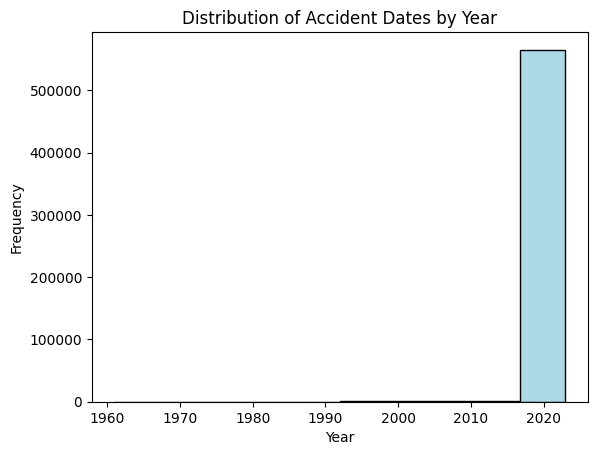

In [75]:
years = df['Accident Date'].dt.year.dropna() 

f.plot_histogram(data=years, 
               xlabel='Year', 
               ylabel='Frequency', 
               title='Distribution of Accident Dates by Year')

Use the Median Difference Between the Two Dates

In [76]:
# Calculate the median difference between 'Assembly Date' and 'Accident Date'
time_diff = (df['Assembly Date'] - df['Accident Date']).median()


In [77]:
df['Accident Date'] = df['Accident Date'].fillna(df['Assembly Date'] - time_diff)

**Birth Year**

can be computed from Age at Injury & accident date

In [78]:
df[df['Birth Year'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Assembly Year,Assembly Month,Assembly Day,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394084,2019-12-29,20.0,N,2020-01-01,N,225.00,NaN,2019-12-31,LM INSURANCE CORP,1A. PRIVATE,3. MED ONLY,KINGS,N,NYC,F,0.0,44.0,IV,81.0,59.0,14.0,11231,6.0,2019.0,12.0,29.0,571411.0,2020,1,1,0.0,2019.0,12.0,31.0,12274.0,285367.0,53207.0,0.0,270778.0,1.0,265981.0,0,0
5393985,2019-12-26,51.0,N,2020-01-01,N,0.00,NaN,2020-01-01,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,QUEENS,N,NYC,F,0.0,72.0,IV,1.0,4.0,37.0,11106,3.0,2019.0,12.0,26.0,571411.0,2020,1,1,0.0,2020.0,1.0,1.0,14366.0,285367.0,58333.0,0.0,270778.0,1.0,265981.0,0,0
5393791,2019-12-23,38.0,N,2020-01-01,N,0.00,NaN,2020-01-01,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,ONONDAGA,N,SYRACUSE,F,0.0,44.0,II,87.0,25.0,14.0,13203,2.0,2019.0,12.0,23.0,571411.0,2020,1,1,0.0,2020.0,1.0,1.0,17540.0,285367.0,15511.0,0.0,44646.0,1.0,85033.0,1,0
5393928,2019-12-27,32.0,N,2020-01-01,Y,519.65,NaN,2019-12-31,LM INSURANCE CORP,1A. PRIVATE,4. TEMPORARY,NEW YORK,N,NYC,M,4.0,44.0,UK,56.0,52.0,42.0,07093,6.0,2019.0,12.0,27.0,571411.0,2020,1,1,1.0,2019.0,12.0,31.0,12274.0,285367.0,30014.0,0.0,270778.0,0.0,33472.0,1,2020
5394185,2019-12-18,64.0,N,2020-01-01,Y,474.00,NaN,2019-12-31,LIBERTY INSURANCE CORP.,1A. PRIVATE,5. PPD SCH LOSS,KINGS,N,NYC,F,2.0,48.0,IV,50.0,52.0,42.0,11210,6.0,2019.0,12.0,18.0,571411.0,2020,1,1,1.0,2019.0,12.0,31.0,1705.0,285367.0,53207.0,0.0,270778.0,1.0,265981.0,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165171,2022-12-28,36.0,N,2022-12-30,N,0.00,NaN,2022-12-30,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,3. MED ONLY,KINGS,N,NYC,F,0.0,72.0,IV,33.0,10.0,53.0,11238,4.0,2022.0,12.0,28.0,571411.0,2022,12,30,0.0,2022.0,12.0,30.0,7527.0,285367.0,53207.0,0.0,270778.0,1.0,265981.0,0,0
6165252,2022-12-17,60.0,N,2022-12-30,N,1854.43,NaN,2022-12-30,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,ALBANY,N,ALBANY,F,0.0,62.0,I,56.0,52.0,-9.0,12047,6.0,2022.0,12.0,17.0,571411.0,2022,12,30,0.0,2022.0,12.0,30.0,111144.0,111144.0,13665.0,0.0,86171.0,1.0,135885.0,0,0
6165481,2022-11-15,40.0,N,2022-12-30,N,0.00,NaN,2022-12-30,NORTH RIVER INSURANCE CO.,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,F,0.0,62.0,UK,30.0,49.0,56.0,18840,6.0,2022.0,11.0,15.0,571411.0,2022,12,30,0.0,2022.0,12.0,30.0,814.0,285367.0,30014.0,0.0,270778.0,1.0,33472.0,0,0


In [79]:
df[df['Birth Year'] == 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Assembly Year,Assembly Month,Assembly Day,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394187,2019-12-14,21.0,N,2020-01-01,N,0.0,0.0,2019-12-31,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,M,0.0,51.0,UK,75.0,37.0,53.0,07649,3.0,2019.0,12.0,14.0,571411.0,2020,1,1,0.0,2019.0,12.0,31.0,14366.0,285367.0,30014.0,0.0,270778.0,0.0,33472.0,0,0
5394053,2019-12-18,53.0,N,2020-01-01,N,0.0,0.0,2020-01-01,TWIN CITY FIRE INS CO.,1A. PRIVATE,2. NON-COMP,WARREN,N,ALBANY,F,0.0,72.0,I,5.0,4.0,56.0,12810,4.0,2019.0,12.0,18.0,571411.0,2020,1,1,0.0,2020.0,1.0,1.0,414.0,285367.0,2268.0,0.0,86171.0,1.0,135885.0,0,0
5393827,2019-12-26,21.0,N,2020-01-01,N,0.0,0.0,2020-01-01,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,M,0.0,72.0,III,16.0,40.0,36.0,11941,3.0,2019.0,12.0,26.0,571411.0,2020,1,1,0.0,2020.0,1.0,1.0,7527.0,285367.0,60430.0,0.0,60536.0,0.0,53654.0,0,0
5393885,2019-12-12,57.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NATIONAL CASUALTY CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,M,0.0,62.0,I,32.0,28.0,44.0,13646,2.0,2019.0,12.0,12.0,571411.0,2020,1,1,0.0,2019.0,12.0,31.0,273.0,285367.0,3355.0,0.0,44646.0,0.0,135885.0,0,0
5394008,2019-12-17,42.0,N,2020-01-01,N,0.0,0.0,2019-12-31,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,F,0.0,51.0,UK,97.0,52.0,38.0,NaN,2.0,2019.0,12.0,17.0,571411.0,2020,1,1,0.0,2019.0,12.0,31.0,14366.0,285367.0,30014.0,0.0,270778.0,1.0,33472.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164729,2022-11-30,44.0,N,2022-12-30,Y,0.0,0.0,2023-01-30,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,BRONX,N,STATEWIDE,M,0.0,NaN,UK,NaN,NaN,-9.0,44405,6.0,2022.0,11.0,30.0,571411.0,2022,12,30,1.0,2023.0,1.0,30.0,1774.0,1774.0,39618.0,0.0,3976.0,0.0,33472.0,1,2023
6165113,2022-12-26,22.0,N,2022-12-30,N,0.0,0.0,2022-12-30,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,F,0.0,51.0,UK,31.0,10.0,53.0,94603,3.0,2022.0,12.0,26.0,571411.0,2022,12,30,0.0,2022.0,12.0,30.0,14366.0,285367.0,30014.0,0.0,270778.0,1.0,33472.0,0,0
6165672,2022-12-28,31.0,N,2022-12-30,N,0.0,0.0,2022-12-30,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,UNKNOWN,N,NYC,M,0.0,42.0,UK,25.0,10.0,41.0,05743,1.0,2022.0,12.0,28.0,571411.0,2022,12,30,0.0,2022.0,12.0,30.0,17540.0,285367.0,1196.0,0.0,270778.0,0.0,33472.0,0,0


In [80]:
df.loc[df['Birth Year'].isna() | (df['Birth Year'] == 0), 
            'Birth Year'] = df['Accident Date'].dt.year - df['Age at Injury']

**C-2 Date**

In [81]:
df[df['C-2 Date'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Assembly Year,Assembly Month,Assembly Day,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393991,2019-12-05,32.0,N,2020-01-02,Y,0.0,1987.0,NaT,STATE INSURANCE FUND,2A. SIF,1. CANCELLED,QUEENS,N,NYC,M,0.0,44.0,IV,NaN,NaN,NaN,11411,4.0,2019.0,12.0,5.0,571411.0,2020,1,2,1.0,NaN,NaN,NaN,111144.0,111144.0,58333.0,0.0,270778.0,0.0,265981.0,1,0
5394018,2019-12-11,44.0,N,2020-01-02,Y,0.0,1975.0,NaT,CHARTER OAK FIRE INS CO,1A. PRIVATE,1. CANCELLED,NEW YORK,N,NYC,M,0.0,NaN,UK,NaN,NaN,NaN,07621,5.0,2019.0,12.0,11.0,571411.0,2020,1,2,1.0,NaN,NaN,NaN,17176.0,285367.0,30014.0,0.0,270778.0,0.0,33472.0,1,2020
5394153,2019-08-15,55.0,N,2020-01-02,N,0.0,1964.0,NaT,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,ALBANY,N,ALBANY,F,0.0,NaN,II,NaN,NaN,NaN,12306,5.0,2019.0,8.0,15.0,571411.0,2020,1,2,0.0,NaN,NaN,NaN,111144.0,111144.0,13665.0,0.0,86171.0,1.0,85033.0,1,0
5393971,2019-06-26,0.0,N,2020-01-02,N,0.0,2019.0,NaT,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,NASSAU,N,NYC,M,0.0,62.0,IV,NaN,NaN,NaN,11801,1.0,2019.0,6.0,26.0,571411.0,2020,1,2,0.0,NaN,NaN,NaN,17540.0,285367.0,43580.0,0.0,270778.0,0.0,265981.0,0,0
5393773,2019-12-27,35.0,N,2020-01-02,N,0.0,1984.0,NaT,SELECTIVE INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,SCHENECTADY,N,ALBANY,M,0.0,NaN,I,NaN,NaN,NaN,12150,3.0,2019.0,12.0,27.0,571411.0,2020,1,2,0.0,NaN,NaN,NaN,682.0,285367.0,1496.0,0.0,86171.0,0.0,135885.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164723,2022-11-30,30.0,N,2022-12-30,N,0.0,1992.0,NaT,STATE INSURANCE FUND,2A. SIF,1. CANCELLED,ROCKLAND,N,NYC,M,0.0,NaN,III,NaN,NaN,NaN,10954,5.0,2022.0,11.0,30.0,571411.0,2022,12,30,0.0,NaN,NaN,NaN,111144.0,111144.0,9125.0,0.0,270778.0,0.0,53654.0,1,0
6164362,2022-12-02,42.0,N,2022-12-30,N,0.0,1980.0,NaT,COUNTY OF NASSAU,3A. SELF PUBLIC,1. CANCELLED,NASSAU,N,NYC,M,0.0,NaN,IV,NaN,NaN,NaN,11590,5.0,2022.0,12.0,2.0,571411.0,2022,12,30,0.0,NaN,NaN,NaN,3791.0,121920.0,43580.0,0.0,270778.0,0.0,265981.0,1,0
6164581,2022-12-06,21.0,N,2022-12-30,N,0.0,2001.0,NaT,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,WESTCHESTER,N,NYC,F,0.0,NaN,III,NaN,NaN,NaN,10701,3.0,2022.0,12.0,6.0,571411.0,2022,12,30,0.0,NaN,NaN,NaN,1774.0,1774.0,25754.0,0.0,270778.0,1.0,53654.0,1,0


In [82]:
# #fill with median
# median_c2_date = df['C-2 Date'].median()

# df['C-2 Date'] = df['C-2 Date'].fillna(median_c2_date)

**Industry Code**

In [83]:
df[(df['Industry Code'].isna()) & (df['Industry Code Description'].isna())]

KeyError: 'Industry Code Description'

In [ ]:
df['Industry Code'].unique()

In [ ]:
# fill with new code for unknown - 0

df['Industry Code'] = df['Industry Code'].fillna(0)
df['Industry Code Description'] = df['Industry Code Description'].fillna('Unknown')

**WCIO Cause of Injury Code**

In [ ]:
df[(df['WCIO Cause of Injury Code'].isna()) & (df['WCIO Cause of Injury Description'].isna())]

In [ ]:
# fill with new code for unknown - 0

df['WCIO Cause of Injury Code'] = df['WCIO Cause of Injury Code'].fillna(0)
df['WCIO Cause of Injury Description'] = df['WCIO Cause of Injury Description'].fillna('Unknown')

**WCIO Part Of Body Code**

In [86]:
df[(df['WCIO Part Of Body Code'].isna()) & (df['WCIO Part Of Body Description'].isna())]

KeyError: 'WCIO Part Of Body Description'

In [87]:
# fill with new code for unknown - 0

df['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].fillna(0)
df['WCIO Part Of Body Description'] = df['WCIO Part Of Body Description'].fillna('Unknown')

KeyError: 'WCIO Part Of Body Description'

**Zip Code**

In [88]:
df[df['Zip Code'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Assembly Year,Assembly Month,Assembly Day,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393066,2019-09-17,64.0,N,2020-01-01,N,1345.97,1954.0,2020-01-01,HARTFORD FIRE INSURANCE CO,1A. PRIVATE,4. TEMPORARY,GENESEE,N,ROCHESTER,F,0.0,33.0,I,97.0,46.0,38.0,NaN,1.0,2019.0,9.0,17.0,571411.0,2020,1,1,0.0,2020.0,1.0,1.0,1130.0,285367.0,2728.0,0.0,40449.0,1.0,135885.0,0,0
5394008,2019-12-17,42.0,N,2020-01-01,N,0.00,1977.0,2019-12-31,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,F,0.0,51.0,UK,97.0,52.0,38.0,NaN,2.0,2019.0,12.0,17.0,571411.0,2020,1,1,0.0,2019.0,12.0,31.0,14366.0,285367.0,30014.0,0.0,270778.0,1.0,33472.0,1,0
5394036,2019-12-23,42.0,N,2020-01-01,Y,1432.44,1977.0,2020-01-01,ACE AMERICAN INSURANCE CO,1A. PRIVATE,5. PPD SCH LOSS,NEW YORK,N,NYC,M,0.0,72.0,IV,29.0,52.0,90.0,NaN,5.0,2019.0,12.0,23.0,571411.0,2020,1,1,1.0,2020.0,1.0,1.0,2887.0,285367.0,30014.0,0.0,270778.0,0.0,265981.0,1,2020
5394181,2019-12-19,49.0,N,2020-01-01,Y,225.00,1970.0,2019-12-31,MICHIGAN MILLERS MUTUAL,1A. PRIVATE,3. MED ONLY,QUEENS,N,NYC,M,6.0,23.0,IV,26.0,40.0,13.0,NaN,2.0,2019.0,12.0,19.0,571411.0,2020,1,1,1.0,2019.0,12.0,31.0,137.0,285367.0,58333.0,0.0,270778.0,0.0,265981.0,1,2021
5394157,2019-12-26,22.0,N,2020-01-01,N,0.00,1997.0,2020-01-01,EASTGUARD INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,QUEENS,N,NYC,M,0.0,44.0,IV,16.0,40.0,36.0,NaN,2.0,2019.0,12.0,26.0,571411.0,2020,1,1,0.0,2020.0,1.0,1.0,153.0,285367.0,58333.0,0.0,270778.0,0.0,265981.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165403,2022-12-21,47.0,N,2022-12-30,N,0.00,1975.0,2022-12-30,CANASERAGA CENTRAL SCHOOL,3A. SELF PUBLIC,2. NON-COMP,ALLEGANY,N,ROCHESTER,F,0.0,61.0,I,80.0,49.0,31.0,NaN,5.0,2022.0,12.0,21.0,571411.0,2022,12,30,0.0,2022.0,12.0,30.0,2.0,121920.0,1743.0,0.0,40449.0,1.0,135885.0,0,0
6165303,2022-12-27,58.0,N,2022-12-30,N,0.00,1964.0,2022-12-30,MEMIC CASUALTY COMPANY,1A. PRIVATE,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,F,0.0,62.0,IV,29.0,40.0,17.0,NaN,4.0,2022.0,12.0,27.0,571411.0,2022,12,30,0.0,2022.0,12.0,30.0,1673.0,285367.0,60430.0,0.0,60536.0,1.0,265981.0,0,0
6164784,2022-12-21,43.0,N,2022-12-30,N,2407.46,1979.0,2022-12-30,HARTFORD CASUALTY INSURANCE CO,1A. PRIVATE,3. MED ONLY,ERIE,N,BUFFALO,M,0.0,54.0,II,33.0,34.0,53.0,NaN,6.0,2022.0,12.0,21.0,571411.0,2022,12,30,0.0,2022.0,12.0,30.0,705.0,285367.0,30874.0,0.0,45605.0,0.0,85033.0,0,0


In [89]:
# fill with new code for unknown - 0

df['Zip Code'] = df['Zip Code'].fillna(99999)

In [90]:
df.isna().sum() / len(df) * 100

Accident Date                         0.000000
Age at Injury                         0.000000
Alternative Dispute Resolution        0.000000
Assembly Date                         0.000000
Attorney/Representative               0.000000
Average Weekly Wage                   4.991246
Birth Year                            0.000000
C-2 Date                              2.536301
Carrier Name                          0.000000
Carrier Type                          0.000000
Claim Injury Type                     0.000000
County of Injury                      0.000000
COVID-19 Indicator                    0.000000
District Name                         0.000000
Gender                                0.000000
IME-4 Count                           0.000000
Industry Code                         1.734593
Medical Fee Region                    0.000000
WCIO Cause of Injury Code             2.724446
WCIO Nature of Injury Code            0.000000
WCIO Part Of Body Code                0.000000
Zip Code     

In [91]:
df = df.dropna()

## 3.4 Train-Test Split

<a href="#top">Top &#129033;</a>

temp df to see outliers and perform feature selection

In [92]:
df2 = df.copy()

In [93]:
X = df2.drop('Claim Injury Type', axis = 1)

y = df2['Claim Injury Type']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify = y, 
                                                    random_state = 1)

/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


## 3.5 Outliers

<a href="#top">Top &#129033;</a>

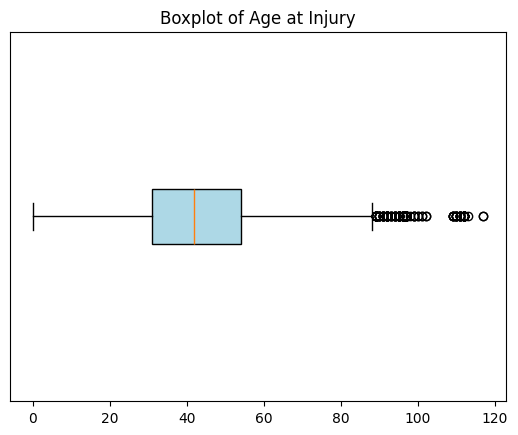

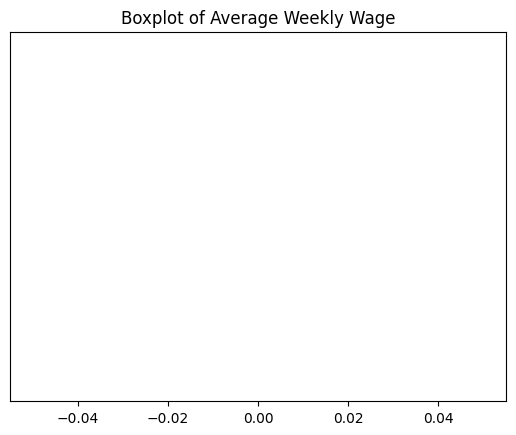

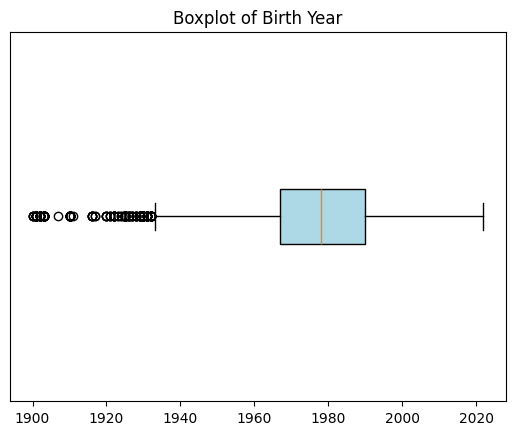

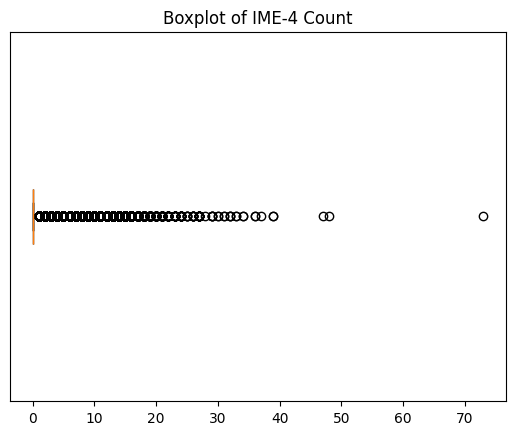

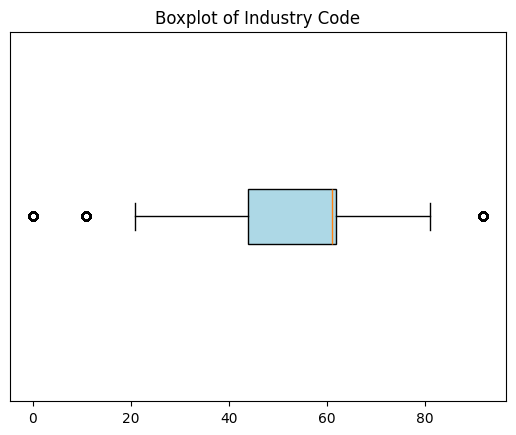

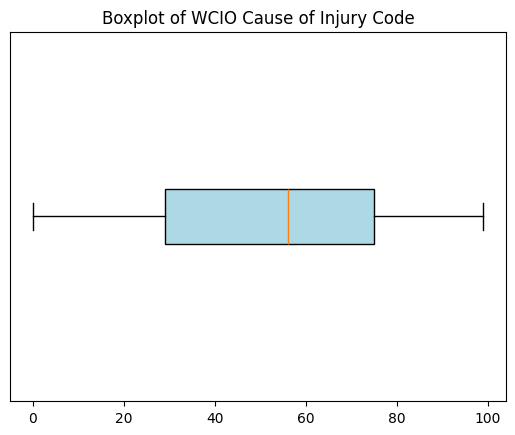

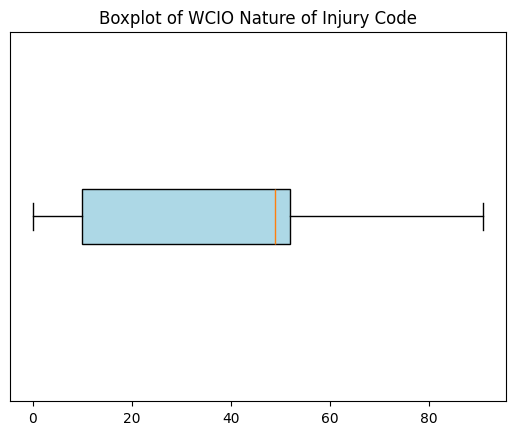

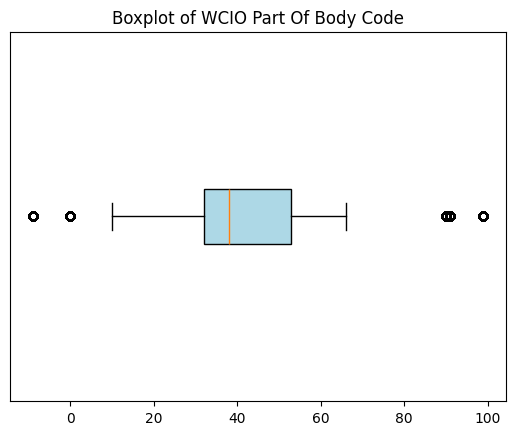

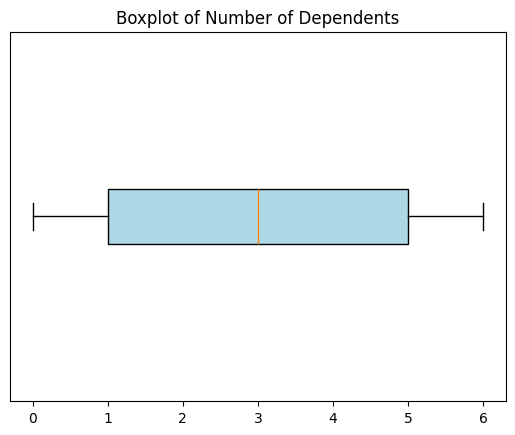

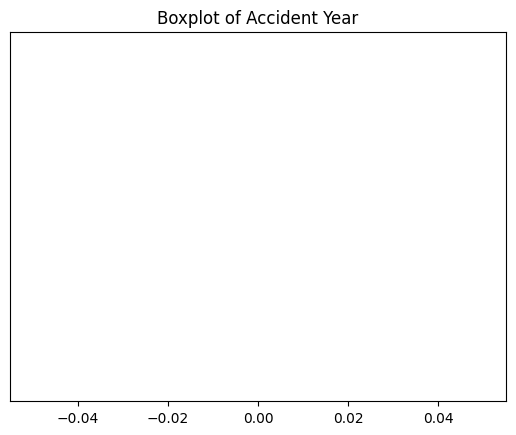

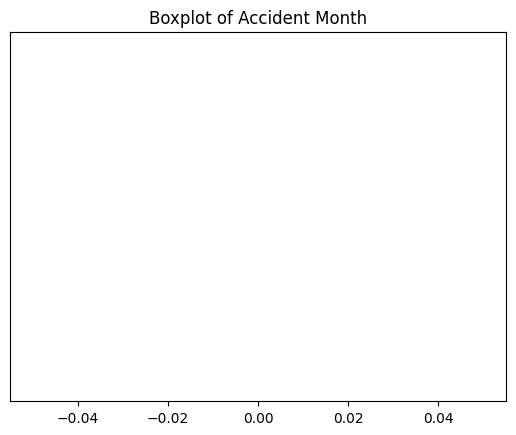

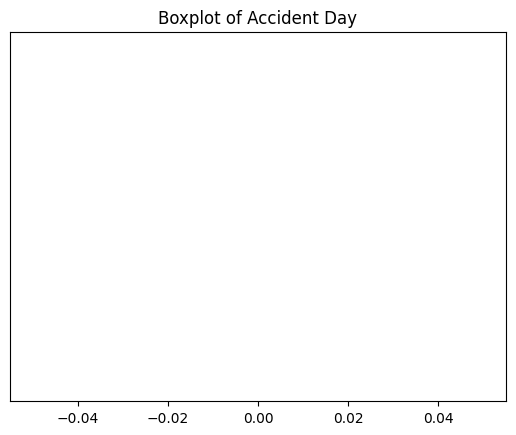

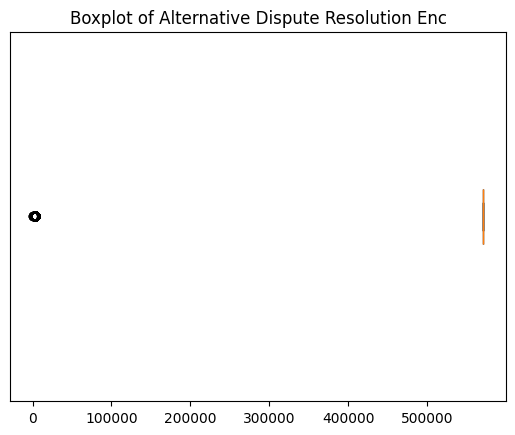

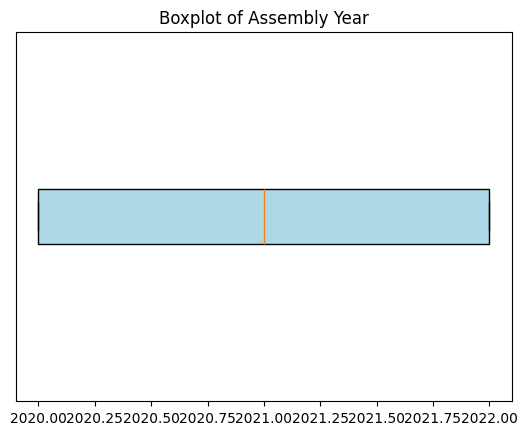

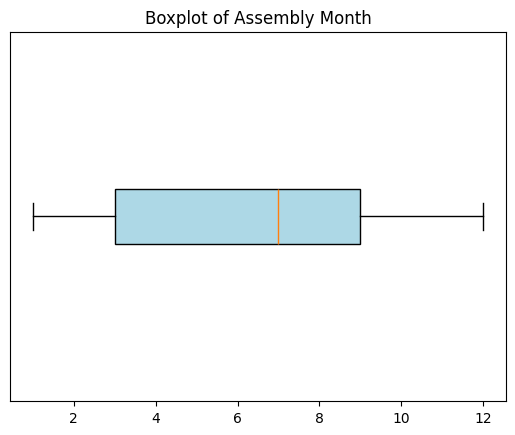

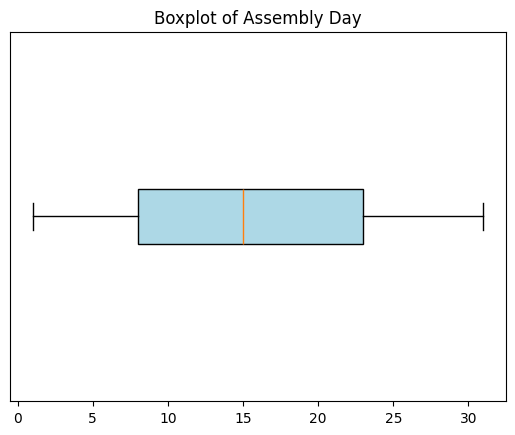

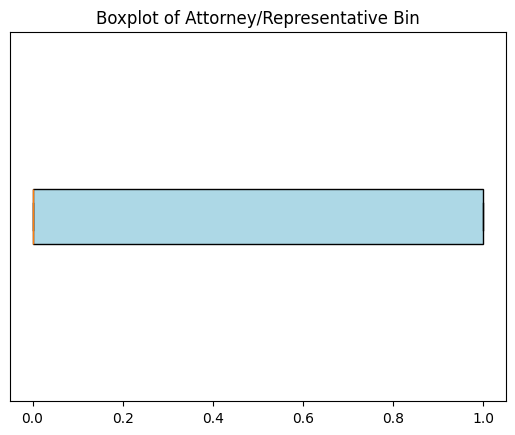

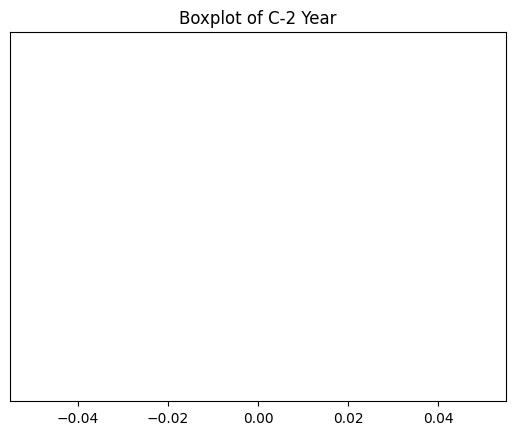

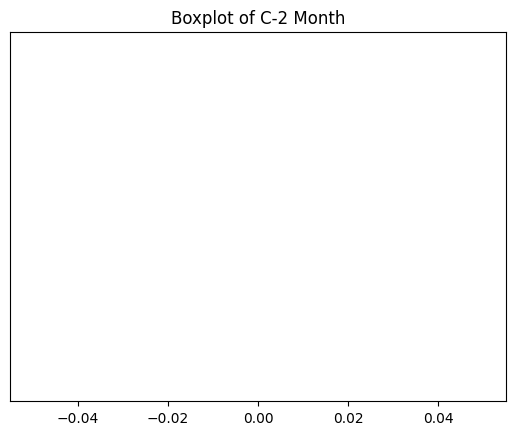

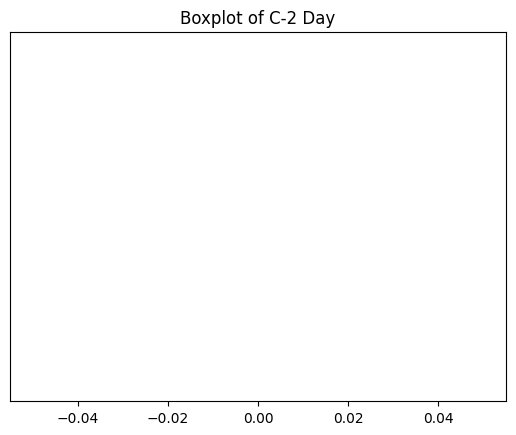

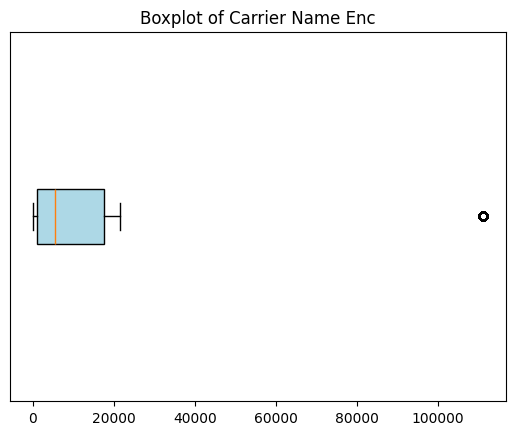

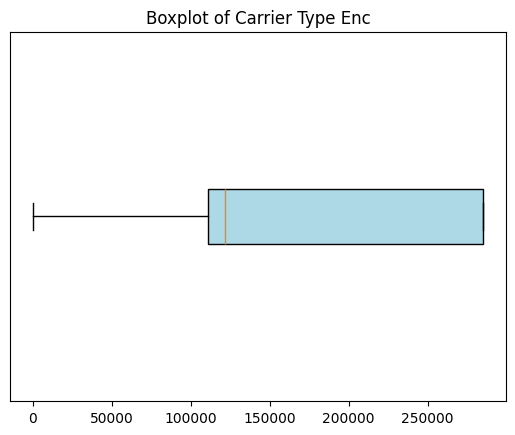

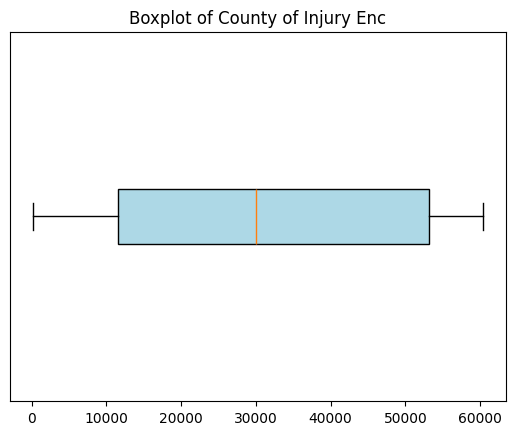

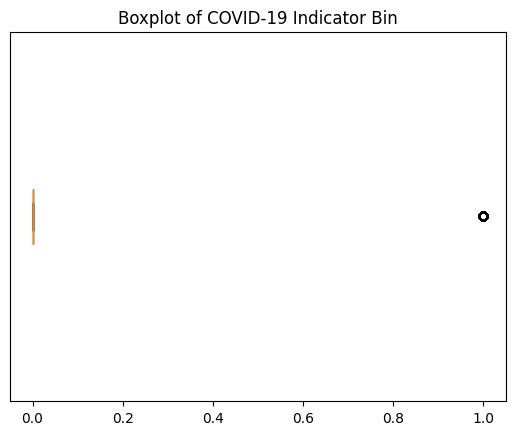

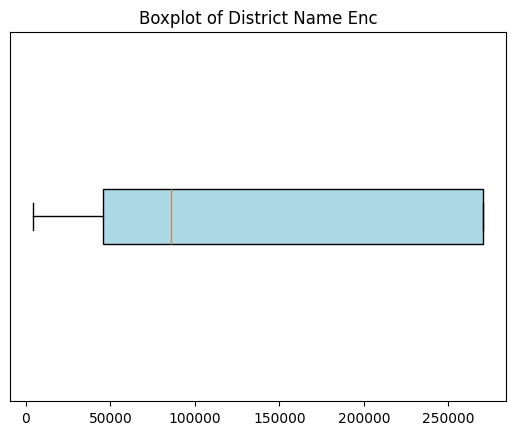

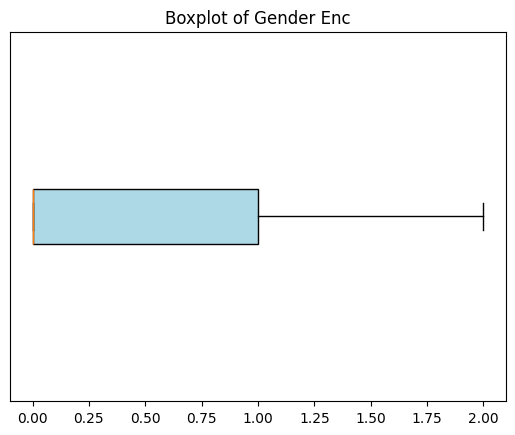

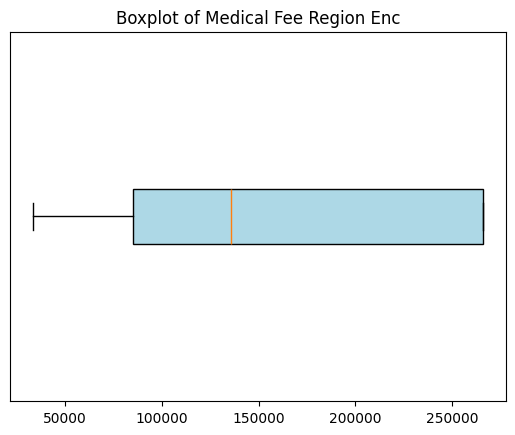

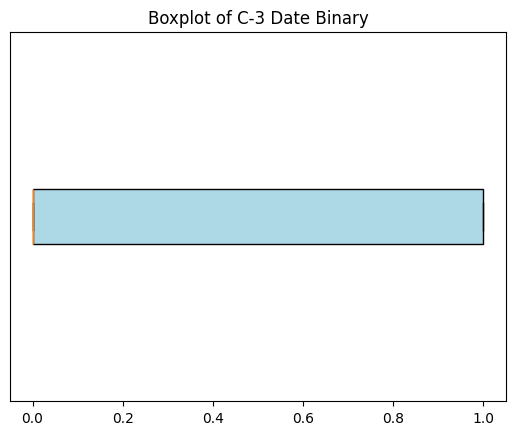

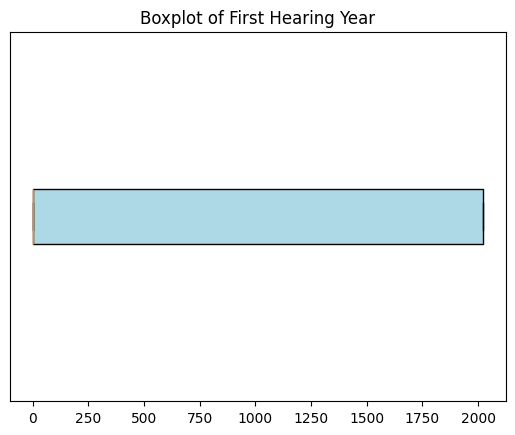

In [99]:
f.boxplots(X_train.loc[:, X_train.columns])

In [ ]:
for column in X_train.columns:
        if pd.api.types.is_numeric_dtype(X_train[column]):
            f.plot_histogram(X_train[column], 
                           xlabel=column, 
                           ylabel='Frequency', 
                           title=f'Histogram of {column}', 
                           color='lightblue')

| Method                 | Distribution Assumption | Sensitivity to Outliers | Complexity | Best Used For                 |
|-----------------------|------------------------|-------------------------|------------|-------------------------------|
| IQR                   | None                    | Low                     | Low        | Skewed distributions          |
| Modified Z-Score      | None                    | Moderate                | Moderate   | Small datasets with outliers  |
| Isolation Forest      | None                    | Low                     | High       | High-dimensional data         |


**Interquartile Range**

In [ ]:
def detect_outliers_iqr(df):
    outliers_indices = set()
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        outliers_indices.update(outlier_data.index)
        
        
        # Print the number of outliers
        print(f'Column: {column} - Number of Outliers: {len(outlier_data)}')
        print(f'Column: {column} - % of Outliers: {len(outlier_data) / len(df) * 100}% \n')
        
    return outliers_indices

In [ ]:
iqr = detect_outliers_iqr(X_train)
iqr

**Isolation Forest**

In [ ]:
from sklearn.ensemble import IsolationForest

def detect_outliers_isolation_forest(df):
    outliers_indices = set()
    
    for column in df.select_dtypes(include=[np.number]).columns:
        # Reshape the data for the model
        data = df[column].values.reshape(-1, 1)
        
        # Fit the Isolation Forest model
        iso_forest = IsolationForest(contamination = 0.01, 
                                     random_state=1)
        outlier_predictions = iso_forest.fit_predict(data)
        
        # Identify outliers (predicted as -1)
        outlier_data = df[outlier_predictions == -1]
        
        outliers_indices.update(outlier_data.index)
        
        # Print the number of outliers
        print(f'Column: {column} - Number of Outliers: {len(outlier_data)}')
        print(f'Column: {column} - % of Outliers: {len(outlier_data) / len(df) * 100:.2f}% \n')

    return outliers_indices

In [ ]:
# iso = detect_outliers_isolation_forest(X_train)
# iso 

In [ ]:
# common_outliers = iqr.intersection(iso)
# print(f'Number of Common Outliers: {len(common_outliers)}')

In [ ]:
# common = X_train.loc[list(common_outliers)]
# common

In [ ]:
# len(common) / len(X_train) * 100

decision - apply log transformation inside k-fold

## 3.6 Visualisations

<a href="#top">Top &#129033;</a>

In [ ]:
all_train = pd.concat([X_train, y_train], axis=1)
all_train.head(2)

In [ ]:
accident_counts = all_train['Accident Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(accident_counts.index, accident_counts.values)
plt.title('Number of Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.xticks()
plt.grid(True)
plt.show()

In [ ]:
# Set up the figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First subplot: Accident Month
sns.countplot(data=all_train, x='Accident Month', ax=axes[0])
axes[0].set_title('Accident Count by Month')
axes[0].set_xlabel('Accident Month')
axes[0].set_ylabel('Count')

# Second subplot: Assembly Month
sns.countplot(data=all_train, x='Assembly Month', ax=axes[1])
axes[1].set_title('Assembly Count by Month')
axes[1].set_xlabel('Assembly Month')
axes[1].set_ylabel('Count')

# Third subplot: C-2 Month
sns.countplot(data=all_train, x='C-2 Month', ax=axes[2])
axes[2].set_title('C-2 Count by Month')
axes[2].set_xlabel('C-2 Month')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age at Injury', y='Average Weekly Wage', data=all_train, scatter_kws={'alpha':0.5})

# Set the labels and title
plt.title('Age at Injury vs Average Weekly Wage')
plt.xlabel('Age at Injury')
plt.ylabel('Average Weekly Wage')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='Gender', y='Average Weekly Wage')
plt.title('Gender vs. Average Weekly Wage')
plt.xlabel('Gender')
plt.ylabel('Average Weekly Wage')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='Carrier Type', y='Age at Injury')
plt.title('Carrier Type vs. Age at Injury')
plt.xlabel('Carrier Type')
plt.ylabel('Age at Injury')
plt.xticks(rotation=30) 
plt.grid(True)
plt.show()

In [ ]:
# num_temp = X_train.select_dtypes(include=[np.number]).columns.tolist()

# # Pairwise Relationship of Numerical Variables
# sns.set()

# # Create pairplot for the selected numerical columns
# sns.pairplot(X_train[num_temp], diag_kind="hist")

# # Layout adjustments
# plt.subplots_adjust(top=0.95)
# plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

# # Display the plot
# plt.show()

In [ ]:
## see distribution of categorical variables
## experiment with density plots
## three way aNOVA

Drop features not needed for modeling purposes

In [100]:
drop = ['Accident Date', 'Alternative Dispute Resolution', 
        'Assembly Date', 'Attorney/Representative', 'C-2 Date',
        'Carrier Name', 'Carrier Type', 'County of Injury', 
        'COVID-19 Indicator', 'District Name', 'Gender',
        'Medical Fee Region']

#X_train = X_train.drop(drop, axis = 1)
#X_test = X_test.drop(drop, axis = 1)

In [101]:
X = X.drop(drop, axis = 1)

# 4. Feature Selection

<a href="#top">Top &#129033;</a>

1. split numeric and categorical 
2. evaluate different scalers for numerical (standard, robust, minmax)
- dont forget we have lots of outliers - see which scaler is better for this
3. Filter based methods
- var, spearman corr for numeric
- chi-square for categ
4. Wrapper
- RFE with different models (multinomial logistic reg to start, maybe)
5. Embedded
- lasso
6. explore other methods not talked about in class
7. produce table with results/insights


**EXAMPLE TABLE**

NUM DATA

| VARIABLE | SPEARMAN | RFE MODEL1 | RFE MODEL2 | LASSO | DECISION |
| -------- | -------- | ---------- | ---------- | ----- | -------- |
| var_name | discard | discard | keep | discard | discard |

CATEG DATA

| VARIABLE | CHI-SQUARE | DECISION |
| -------- | ---------- | -------- |
| var_name | keep | keep |

In [97]:
X_train.select_dtypes

<bound method DataFrame.select_dtypes of                  Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5980128             2022-04-25           25.0                              N   
5676390             2021-05-18           37.0                              N   
5657215             2021-01-29           44.0                              N   
5405293             2019-12-21           39.0                              N   
5694244             2021-03-26           48.0                              N   
...                        ...            ...                            ...   
5670127             2021-02-19           45.0                              N   
6045067             2022-07-19           28.0                              N   
6151036             2022-11-29           29.0                              N   
5799631             2021-08-17           44.0                              N   

**Split Datatypes**

In [98]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64'])
categorical_features = X_train.select_dtypes(include=['object'])

In [99]:
print("\nNumerical Data:")
numeric_features.head()


Numerical Data:


,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,
5980128,25.0,1079.4,1996.0,0.0,62.0,74.0,7.0,18.0,5.0,2022.0,4.0,25.0,571411.0,0.0,2022.0,5.0,2.0,111144.0,111144.0,4541.0,0.0,44646.0,1.0,135885.0,0,0
5676390,37.0,1448.0,1983.0,0.0,92.0,97.0,52.0,53.0,0.0,2021.0,5.0,18.0,571411.0,1.0,2021.0,10.0,28.0,6415.0,121920.0,30014.0,0.0,270778.0,0.0,53654.0,1,2021
5657215,44.0,0.0,1977.0,0.0,92.0,56.0,52.0,33.0,6.0,2021.0,1.0,29.0,571411.0,1.0,2021.0,2.0,11.0,111144.0,111144.0,1120.0,0.0,86171.0,0.0,135885.0,0,0
5405293,39.0,0.0,1980.0,0.0,62.0,32.0,37.0,53.0,5.0,2019.0,12.0,21.0,571411.0,0.0,2020.0,1.0,15.0,136.0,285367.0,24071.0,0.0,40449.0,1.0,85033.0,0,0
5694244,48.0,715.6,1972.0,0.0,92.0,56.0,34.0,61.0,6.0,2021.0,3.0,26.0,571411.0,0.0,2021.0,4.0,5.0,111144.0,111144.0,1504.0,0.0,40449.0,0.0,135885.0,1,0


In [100]:
print("\nCategorical Data:")
categorical_features.head()


Categorical Data:


,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Medical Fee Region,Zip Code
Claim Identifier,,,,,,,,,,
5980128,N,N,STATE INSURANCE FUND,2A. SIF,CAYUGA,N,SYRACUSE,F,I,13045
5676390,N,Y,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,NEW YORK,N,NYC,M,III,10924
5657215,N,Y,STATE INSURANCE FUND,2A. SIF,ESSEX,N,ALBANY,M,I,12977
5405293,N,N,CAROLINA CASUALTY INS CO,1A. PRIVATE,MONROE,N,ROCHESTER,F,II,14621
5694244,N,N,STATE INSURANCE FUND,2A. SIF,ORLEANS,N,ROCHESTER,M,I,14411


**Scaling Numeric Data**

In [101]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
X_train_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(numeric_features), columns=numeric_features.columns)

print("Standard Scaled Data Sample:")
X_train_standard_scaled.describe()

/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validatio

Standard Scaled Data Sample:


,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc,C-3 Date Binary,First Hearing Year
count,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05,4.221000e+05
mean,-1.669885e-16,-1.770886e-17,4.219826e-16,3.996277e-17,-3.957560e-17,1.260494e-16,-8.893147e-17,-4.962521e-17,6.464070e-18,1.209539e-14,-5.502877e-17,9.358594e-17,-8.568327e-15,3.173960e-17,5.292501e-14,-1.426641e-16,8.686095e-17,-4.952421e-17,-1.803206e-16,3.841408e-17,7.423581e-17,6.632406e-17,6.639139e-17,5.107289e-17,6.655972e-17,3.999644e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.069513e+00,-9.079053e-02,-5.597905e+00,-3.928513e-01,-2.439513e+00,-2.060804e+00,-1.844360e+00,-2.169136e+00,-1.503761e+00,-3.590644e+01,-1.584708e+00,-1.653618e+00,-1.385112e+02,-6.730989e-01,-2.394275e+01,-1.588551e+00,-1.681283e+00,-6.308642e-01,-2.125745e+00,-1.492422e+00,-2.231567e-01,-1.422051e+00,-8.374914e-01,-1.587473e+00,-6.819160e-01,-6.022701e-01
25%,-8.270433e-01,-9.079053e-02,-7.884464e-01,-3.928513e-01,-7.039980e-01,-8.997124e-01,-1.123357e+00,-2.944200e-01,-1.003812e+00,-5.176078e-01,-1.007911e+00,-8.563724e-01,7.219631e-03,-6.730989e-01,-1.001006e+00,-1.008548e+00,-8.778852e-01,-6.062934e-01,-9.175262e-01,-9.477936e-01,-2.231567e-01,-1.035642e+00,-8.374914e-01,-1.007544e+00,-6.819160e-01,-6.022701e-01
50%,-3.132819e-02,-9.079053e-02,1.166112e-03,-3.928513e-01,1.127147e-01,6.786413e-02,3.637118e-01,-7.123947e-02,-3.913368e-03,8.220292e-02,1.456825e-01,-5.912682e-02,7.219631e-03,-6.730989e-01,-4.510037e-02,1.514583e-01,-7.448680e-02,-4.981246e-01,9.764775e-01,-6.442091e-02,-2.231567e-01,-6.591000e-01,-8.374914e-01,-4.355908e-01,-6.819160e-01,-6.022701e-01
75%,8.367247e-01,6.557335e-02,8.625616e-01,-3.928513e-01,6.231602e-01,8.032223e-01,4.988998e-01,5.983020e-01,9.959853e-01,6.820137e-01,7.224793e-01,8.520109e-01,7.219631e-03,1.485666e+00,9.108056e-01,7.314615e-01,8.436827e-01,-2.140865e-01,9.764775e-01,1.044001e+00,-2.231567e-01,1.054460e+00,1.116234e+00,1.027653e+00,1.466456e+00,1.658454e+00
max,5.394002e+00,5.080221e+02,3.159616e+00,3.717922e+01,1.695096e+00,1.732096e+00,2.256344e+00,2.651563e+00,1.495935e+00,1.281824e+00,1.587674e+00,1.763149e+00,7.219631e-03,1.485666e+00,2.822618e+00,1.601466e+00,1.761852e+00,2.010217e+00,9.764775e-01,1.389197e+00,4.481156e+00,1.054460e+00,3.069959e+00,1.027653e+00,1.466456e+00,1.662930e+00


In [102]:
from sklearn.preprocessing import RobustScaler

scaler_robust = RobustScaler()
X_train_robust_scaled = pd.DataFrame(scaler_robust.fit_transform(numeric_features), columns=numeric_features.columns)

print("Robust Scaled Data Sample:")
X_train_robust_scaled.describe()

/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validatio

Robust Scaled Data Sample:


,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc,C-3 Date Binary,First Hearing Year
count,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000
mean,0.018830,0.580636,-0.000706,0.763284,-0.084929,-0.039851,-0.224201,0.079800,0.001957,-0.068524,-0.084191,0.034610,-29.646160,0.311798,0.023590,-0.087045,0.043267,1.270056,-0.515563,0.032343,0.047437,0.315343,0.428664,0.214029,0.317411,0.266406
std,0.601046,6.395346,0.605691,1.942935,0.753491,0.587222,0.616426,1.120171,0.500051,0.833597,0.577905,0.585349,4106.331206,0.463228,0.523065,0.574710,0.580867,2.549678,0.527983,0.502060,0.212571,0.478446,0.511843,0.491353,0.465469,0.442337
min,-1.826087,0.000000,-3.391304,0.000000,-1.923077,-1.250000,-1.361111,-2.350000,-0.750000,-30.000000,-1.000000,-0.933333,-568802.000000,0.000000,-12.500000,-1.000000,-0.933333,-0.338443,-1.637918,-0.716942,0.000000,-0.365030,0.000000,-0.565980,0.000000,0.000000
25%,-0.478261,0.000000,-0.478261,0.000000,-0.615385,-0.568182,-0.916667,-0.250000,-0.500000,-0.500000,-0.666667,-0.466667,0.000000,0.000000,-0.500000,-0.666667,-0.466667,-0.275795,-1.000000,-0.443506,0.000000,-0.180155,0.000000,-0.281031,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.521739,1.000000,0.521739,0.000000,0.384615,0.431818,0.083333,0.750000,0.500000,0.500000,0.333333,0.533333,0.000000,1.000000,0.500000,0.333333,0.533333,0.724205,0.000000,0.556494,0.000000,0.819845,1.000000,0.718969,1.000000,1.000000
max,3.260870,3249.554319,1.913043,73.000000,1.192308,0.977273,1.166667,3.050000,0.750000,1.000000,0.833333,1.066667,0.000000,1.000000,1.500000,0.833333,1.066667,6.395456,0.000000,0.729803,1.000000,0.819845,2.000000,0.718969,1.000000,1.001980


In [103]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
X_train_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(numeric_features), columns=numeric_features.columns)

print("MinMax Scaled Data Sample:")
X_train_minmax_scaled.describe()

/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validatio

MinMax Scaled Data Sample:


,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc,C-3 Date Binary,First Hearing Year
count,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000,422100.000000
mean,0.362676,0.000179,0.639211,0.010456,0.590023,0.543332,0.449767,0.449963,0.501305,0.965531,0.499532,0.483972,0.999948,0.311798,0.894542,0.497976,0.488300,0.238866,0.685233,0.517911,0.047437,0.574215,0.214332,0.607035,0.317411,0.265879
std,0.118154,0.001968,0.114188,0.026616,0.241861,0.263651,0.243861,0.207439,0.333367,0.026890,0.315221,0.292675,0.007219,0.463228,0.037362,0.313478,0.290433,0.378633,0.322350,0.347028,0.212571,0.403794,0.255922,0.382391,0.465469,0.441463
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.264957,0.000000,0.549180,0.000000,0.419753,0.306122,0.175824,0.388889,0.166667,0.951613,0.181818,0.233333,1.000000,0.000000,0.857143,0.181818,0.233333,0.009303,0.389469,0.189001,0.000000,0.156030,0.000000,0.221759,0.000000,0.000000
50%,0.358974,0.000000,0.639344,0.000000,0.617284,0.561224,0.538462,0.435185,0.500000,0.967742,0.545455,0.466667,1.000000,0.000000,0.892857,0.545455,0.466667,0.050260,1.000000,0.495555,0.000000,0.308075,0.000000,0.440469,0.000000,0.000000
75%,0.461538,0.000308,0.737705,0.000000,0.740741,0.755102,0.571429,0.574074,0.833333,0.983871,0.727273,0.733333,1.000000,1.000000,0.928571,0.727273,0.733333,0.157806,1.000000,0.880208,0.000000,1.000000,0.500000,1.000000,1.000000,0.998024
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Summary of Scaling Methods for Numerical Data

#### 1. **RobustScaler**
- **Ideal for handling outliers**: The **RobustScaler** is best when working with data that contains outliers, as it scales based on the interquartile range (IQR), making it less sensitive to extreme values.
- **Example**: Features like **'IME-4 Count'** have large outliers that could distort the scaling. **RobustScaler** mitigates this issue.

#### 2. **StandardScaler**
- **Works well for normally distributed data**: The **StandardScaler** standardizes data by centering it with a mean of zero and scaling it by the standard deviation. It is effective when our data is normally distributed.
- **Example**: The feature **'Birth Year'** has a normal distribution and is well-centered using this scaler.

#### 3. **MinMaxScaler**
- **Sensitive to outliers**: The **MinMaxScaler** compresses data into a 0–1 range, but is vulnerable to outliers, which can significantly skew the result. It's most effective when applied to features with moderate ranges or when the model is sensitive to the feature range.
- **Example**: The **'Industry Code'** feature, with a moderate range, benefits from this transformation.

---

### Scaling Results Summary:

| Feature | **RobustScaler** | **StandardScaler** | **MinMaxScaler** |
|---------|------------------|--------------------|------------------|
| **Age at Injury** | Median-based scaling to handle outliers | Scaled to have mean = 0, std = 1 | Values between 0 and 1 |
| **Average Weekly Wage** | Robust to large outliers | Scaled but affected by outliers | Most values compressed due to extreme values |
| **Birth Year** | Handles skew in birth year data | Centered around mean | No major issues |
| **IME-4 Count** | Effective for highly skewed counts | Still influenced by outliers | Compression due to large counts |
| **Industry Code** | Efficient scaling due to moderate range | Normalized for centered values | All values mapped to 0–1 range |

---

### Recommendation:
Given that our dataset contains outliers in variables like **'IME-4 Count'** and **'Average Weekly Wage'**, the **RobustScaler** is the best choice for this scenario, in my opinion. It effectively handles skewed data without the influence of outliers. However, if we require data centering for algorithms that depend on normalized features, we can also consider using the **StandardScaler** after addressing outliers.


**Filter-Based Methods**

**Numerical Data: Variance Threshold**

In [106]:
X_train.var()

TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'var'

In [104]:
from sklearn.feature_selection import VarianceThreshold

# Set a variance threshold (0.01)
threshold = 0.01
selector = VarianceThreshold(threshold=threshold)

X_train_high_variance = selector.fit_transform(X_train_standard_scaled)
print(f"Number of features after variance threshold: {X_train_high_variance.shape[1]}")


Number of features after variance threshold: 26


/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validatio

**Numerical Data: Spearman Correlation**

In [ ]:
# Calculate Spearman correlation matrix
correlation_matrix = X_train_standard_scaled.corr(method='spearman')

# Set a correlation threshold, 0.9
correlation_threshold = 0.9

# Find pairs of highly correlated features
high_correlation_pairs = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            high_correlation_pairs.add(colname)

# Drop highly correlated features
X_train_dropped_correlated = X_train_standard_scaled.drop(columns=high_correlation_pairs)
print(f"Features dropped due to high correlation: {high_correlation_pairs}")

**This means no highly correlated features were found using the threshold of 0.9. Since the logic works, we don't need to modify this either, though we could adjust the threshold if needed.**

**Categorical Data: Chi-Square Test**

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Ensure all categorical features are strings
categorical_features = categorical_features.astype(str)

# Apply LabelEncoder to each categorical column
categorical_features_encoded = categorical_features.apply(LabelEncoder().fit_transform)

# Apply Chi-Square test
chi2_values, p_values = chi2(categorical_features_encoded, y_train)
chi2_results = pd.DataFrame({'Feature': categorical_features.columns, 'Chi2': chi2_values, 'p-value': p_values})

# Filter features with p-values < 0.05 (significant)
chi2_significant = chi2_results[chi2_results['p-value'] < 0.05]
print(f"Significant categorical features based on Chi-Square test: {chi2_significant['Feature'].tolist()}")

**These are the categorical features that show a significant relationship with the target variable based on the Chi-Square test, with p-values less than 0.05.**

**Wrapper Methods - Recursive Feature Elimination (RFE)**

In [ ]:
print(X_train.dtypes)

In [ ]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [ ]:
rfe = RFE(estimator = model, n_features_to_select = 3)

In [ ]:
X_rfe = rfe.fit_transform(X = X_train, y = y_train)

In [ ]:
X_train.columns

In [ ]:
rfe.support_

In [ ]:
#dont know optimum number of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs') #model can be changed as we want
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_test)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
#embbeded lasso regression
from sklearn.linear_model import LassoCV
reg = LassoCV()

In [ ]:
reg.fit(X_train, y_train)

In [ ]:
coef = pd.Series(reg.coef_, index = X_train.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
plot_importance(coef,'Lasso')

## 5. K Fold

<a href="#top">Top &#129033;</a>

In [ ]:
##### TEMP

In [102]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574025 entries, 5393875 to 6165075
Data columns (total 34 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Age at Injury                       574025 non-null  float64
 1   Average Weekly Wage                 545374 non-null  float64
 2   Birth Year                          574025 non-null  float64
 3   IME-4 Count                         574025 non-null  float64
 4   Industry Code                       574025 non-null  float64
 5   Industry Code Description           574025 non-null  object 
 6   WCIO Cause of Injury Code           574025 non-null  float64
 7   WCIO Cause of Injury Description    574025 non-null  object 
 8   WCIO Nature of Injury Code          574025 non-null  float64
 9   WCIO Nature of Injury Description   574025 non-null  object 
 10  WCIO Part Of Body Code              574025 non-null  float64
 11  WCIO Part Of Body Descri

In [103]:
X[pd.to_numeric(X['Zip Code'], errors='coerce').isna()]

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Industry Code,Industry Code Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Assembly Year,Assembly Month,Assembly Day,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5399802,25.0,1631.50,1994.0,0.0,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,52.0,UPPER LEG,L1N 5,0.0,2019.0,12.0,21.0,571411.0,2020,1,9,0.0,2020.0,1.0,9.0,111144.0,111144.0,30874.0,0.0,45605.0,0.0,33472.0,0,0
5404203,29.0,1401.17,1991.0,2.0,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,T1B0P,5.0,2020.0,1.0,11.0,571411.0,2020,1,16,1.0,2020.0,3.0,11.0,4566.0,285367.0,4413.0,0.0,45605.0,0.0,33472.0,1,2020
5407348,23.0,0.00,1996.0,0.0,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",99.0,"OTHER - MISCELLANEOUS, NOC",7.0,CONCUSSION,18.0,SOFT TISSUE,L6Y 1,2.0,2019.0,12.0,28.0,571411.0,2020,1,17,0.0,2020.0,1.0,17.0,111144.0,111144.0,30874.0,0.0,45605.0,0.0,33472.0,0,0
5412514,51.0,0.00,1968.0,0.0,31.0,MANUFACTURING,10.0,MACHINE OR MACHINERY,13.0,CRUSHING,52.0,UPPER LEG,JMDMR,4.0,2019.0,11.0,26.0,571411.0,2020,1,24,0.0,2020.0,1.0,24.0,111144.0,111144.0,1628.0,0.0,40449.0,0.0,33472.0,0,0
5413081,27.0,0.00,1993.0,0.0,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,54.0,LOWER LEG,N2P 1,3.0,2020.0,1.0,21.0,571411.0,2020,1,27,0.0,2020.0,1.0,27.0,111144.0,111144.0,30874.0,0.0,45605.0,0.0,33472.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143240,23.0,0.00,1999.0,0.0,55.0,MANAGEMENT OF COMPANIES AND ENTERPRISES,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,35.0,HAND,V1M2B,2.0,2022.0,11.0,7.0,571411.0,2022,11,29,0.0,2022.0,11.0,29.0,575.0,285367.0,30014.0,0.0,270778.0,0.0,33472.0,0,0
6147711,29.0,0.00,1993.0,0.0,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,19.0,"CUT, PUNCTURE, SCRAPE, NOC",43.0,PUNCTURE,36.0,FINGER(S),L2P0A,3.0,2022.0,11.0,2.0,571411.0,2022,12,6,0.0,2022.0,12.0,6.0,11038.0,285367.0,6727.0,0.0,21864.0,0.0,33472.0,0,0
6150118,25.0,1748.25,1997.0,2.0,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",53.0,TWISTING,52.0,STRAIN OR TEAR,55.0,ANKLE,L6L 1,0.0,2022.0,1.0,29.0,571411.0,2022,12,9,1.0,2022.0,12.0,20.0,111144.0,111144.0,13665.0,0.0,45605.0,0.0,33472.0,1,2024


In [104]:
X = X[pd.to_numeric(X['Zip Code'], errors='coerce').notna()]

In [105]:
X = X.drop(['Industry Code Description', 'WCIO Cause of Injury Description',
        'WCIO Nature of Injury Description', 'WCIO Part Of Body Description'],
          axis = 1)

In [106]:
X['Number of Dependents'].astype(int)

Claim Identifier
5393875    1
5393091    4
5393889    6
5393887    1
5393863    5
          ..
6165265    4
6165285    6
6165506    3
6165339    5
6165075    3
Name: Number of Dependents, Length: 573678, dtype: int64

In [107]:
X.isna().sum()

Age at Injury                             0
Average Weekly Wage                   28635
Birth Year                                0
IME-4 Count                               0
Industry Code                             0
WCIO Cause of Injury Code                 0
WCIO Nature of Injury Code                0
WCIO Part Of Body Code                    0
Zip Code                                  0
Number of Dependents                      0
Accident Year                          3688
Accident Month                         3688
Accident Day                           3688
Alternative Dispute Resolution Enc        0
Assembly Year                             0
Assembly Month                            0
Assembly Day                              0
Attorney/Representative Bin               0
C-2 Year                              14557
C-2 Month                             14557
C-2 Day                               14557
Carrier Name Enc                          0
Carrier Type Enc                

In [108]:
import warnings
warnings.filterwarnings("ignore")

In [109]:
X = X.dropna()

In [119]:
X.isna().sum()

Age at Injury                         0
Average Weekly Wage                   0
Birth Year                            0
IME-4 Count                           0
Industry Code                         0
WCIO Cause of Injury Code             0
WCIO Nature of Injury Code            0
WCIO Part Of Body Code                0
Zip Code                              0
Number of Dependents                  0
Accident Year                         0
Accident Month                        0
Accident Day                          0
Alternative Dispute Resolution Enc    0
Assembly Year                         0
Assembly Month                        0
Assembly Day                          0
Attorney/Representative Bin           0
C-2 Year                              0
C-2 Month                             0
C-2 Day                               0
Carrier Name Enc                      0
Carrier Type Enc                      0
County of Injury Enc                  0
COVID-19 Indicator Bin                0


In [120]:
X.fillna(0, inplace=True)

In [110]:
y.isna().sum()

0

In [111]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

In [112]:
print(X.isnull().sum())

Age at Injury                         0
Average Weekly Wage                   0
Birth Year                            0
IME-4 Count                           0
Industry Code                         0
WCIO Cause of Injury Code             0
WCIO Nature of Injury Code            0
WCIO Part Of Body Code                0
Zip Code                              0
Number of Dependents                  0
Accident Year                         0
Accident Month                        0
Accident Day                          0
Alternative Dispute Resolution Enc    0
Assembly Year                         0
Assembly Month                        0
Assembly Day                          0
Attorney/Representative Bin           0
C-2 Year                              0
C-2 Month                             0
C-2 Day                               0
Carrier Name Enc                      0
Carrier Type Enc                      0
County of Injury Enc                  0
COVID-19 Indicator Bin                0


In [113]:
######

In [114]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier


In [115]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [116]:
pipeline = Pipeline([
    #('imputer', KNNImputer(n_neighbors=5)),
    
    ('scaler', RobustScaler()),
    ('log_transformer', FunctionTransformer(np.log1p, validate=True)),
    #('custom_selector', FunctionTransformer(custom_feature_selection)),
    ('model', RandomForestClassifier())
])

In [123]:
X = X.drop('Zip Code', axis = 1)

In [126]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529226 entries, 5393875 to 6165075
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Age at Injury                       529226 non-null  float64
 1   Average Weekly Wage                 529226 non-null  float64
 2   Birth Year                          529226 non-null  float64
 3   IME-4 Count                         529226 non-null  float64
 4   Industry Code                       529226 non-null  float64
 5   WCIO Cause of Injury Code           529226 non-null  float64
 6   WCIO Nature of Injury Code          529226 non-null  float64
 7   WCIO Part Of Body Code              529226 non-null  float64
 8   Number of Dependents                529226 non-null  float64
 9   Accident Year                       529226 non-null  float64
 10  Accident Month                      529226 non-null  float64
 11  Accident Day            

In [129]:
try:
    model = RandomForestClassifier()
    model.fit(X, y)
except ValueError as e:
    print(f"ValueError: {e}")

ValueError: Found input variables with inconsistent numbers of samples: [529226, 574025]


In [132]:
y = pd.Series(y)
y = y[y.index.isin(X.index)]

In [133]:
for train_index, test_index in kf.split(X):
    
    # Split data into training and validation folds
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    
    
    #scale
    
    # treate missing values in WAGE
    
    # treat outleirs using log
    
    # Train your model on the training fold (with outliers handled)
    pipeline.fit(X_train, y_train)
    
    # Predict on the validation fold (without outlier detection here)
    pred_train = pipeline.predict(X_train)
    pred_val = pipeline.predict(X_val)
    
    metrics(y_train, pred_train , y_val, pred_val)
    
    

KeyError: "None of [Index([     0,      1,      3,      4,      5,      8,      9,     10,     11,\n           12,\n       ...\n       529213, 529214, 529215, 529216, 529217, 529218, 529219, 529221, 529223,\n       529225],\n      dtype='int64', length=423380)] are in the [index]"

In [125]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

**Average Weekly Wage**

In [ ]:
X_train[X_train['Average Weekly Wage'].isna()]

KNN - Imputation

In [ ]:
from sklearn.impute import KNNImputer

num = X_train.select_dtypes(include=[float, int]).columns

imputer = KNNImputer(n_neighbors=5)

X_train[num] = imputer.fit_transform(X_train[num])

In [ ]:
X_train[X_train['Average Weekly Wage'].isna()]

verify success of operations

In [ ]:
X_train.isna().sum()

In [ ]:
#erjngioertng

look at X_train and X_test before removing replaced columns

In [ ]:
X_train.head(2)

drop variables that will not be needed for modeling purposes

# 3. Export

<a href="#top">Top &#129033;</a>

In [ ]:
#df.to_csv('./project_data/treated_data')